In [5]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, accuracy_score, precision_score, \
    recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from binet_keras import get_tf_model
from utils import get_feature_labels, get_binetflow_files, get_saved_data, \
        get_classifier, mask_features
from summarizer import Summarizer
from binet_keras import get_tf_model

def plot_roc_curve(clfname, feature, label, name, test_size=0.5):
    feature = mask_features(feature)
    feat_train, feat_test, label_train, label_test = train_test_split(
                    feature, label, test_size=test_size,
                    random_state=42)
    if clfname == 'tf':
        model = get_tf_model(dimension=17)
        model.fit(feat_train, label_train, nb_epoch=10, batch_size=32, verbose=False)
        y_score = model.predict_proba(feat_test, batch_size=32, verbose=0)
        _, acc, precision, recall = model.evaluate(feat_test, label_test, batch_size=32, verbose=False)
        print(acc, precision, recall)
        fpr, tpr, _ = roc_curve(label_test, y_score[:])
    else:
        classifier = get_classifier(clfname)
        classifier.fit(feat_train, label_train)
        y_score = classifier.predict_proba(feat_test)
        predicted = classifier.predict(feat_test)
        print(accuracy_score(label_test, predicted), precision_score(label_test, predicted),
              recall_score(label_test, predicted))
        fpr, tpr, _ = roc_curve(label_test[:], y_score[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plotting
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC area under curve = {0:.4f}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')
    plt.title('ROC for {} with {}'.format(name, clfname))
    plt.show()

binet_files = get_binetflow_files()

Using TensorFlow backend.


0.993522864423 0.980027485112 0.975825579274


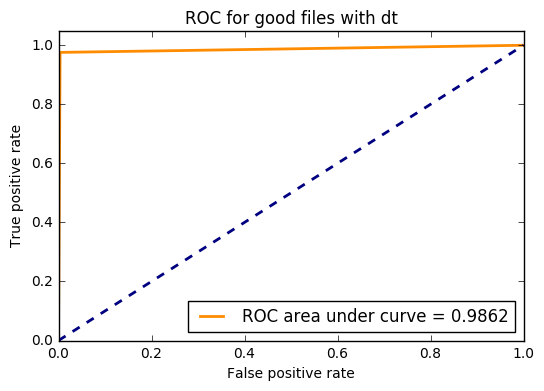

0.982637119485 0.977973350473 0.902207626346


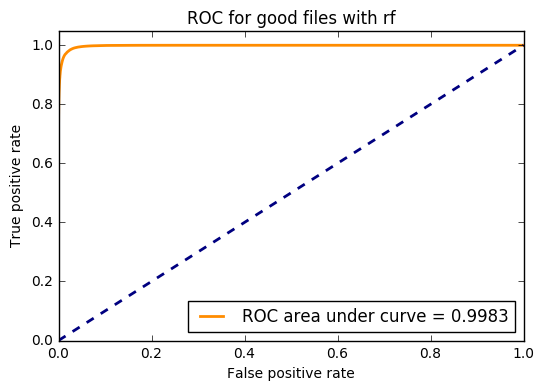

0.997609628537 0.99375917775 0.977994258448


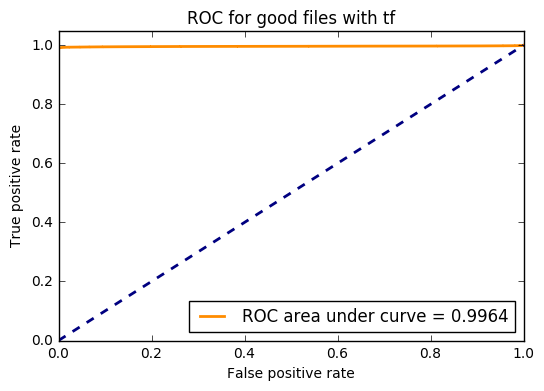

In [4]:
good_files = [9, 8, 12]
summaries = []
for b in good_files:
    summaries += get_saved_data(0.15, binet_files[b])
feature, label = get_feature_labels(summaries)
plot_roc_curve('dt', feature, label, 'good files')
plot_roc_curve('rf', feature, label, 'good files')
plot_roc_curve('tf', feature, label, 'good files')

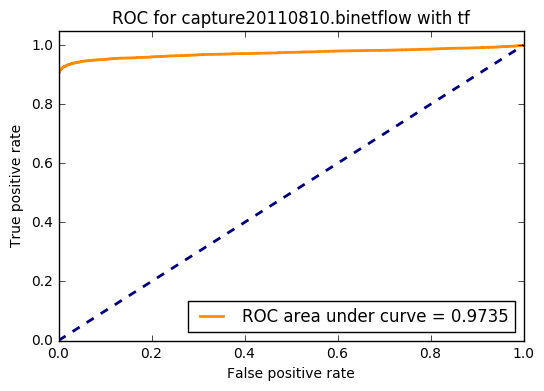

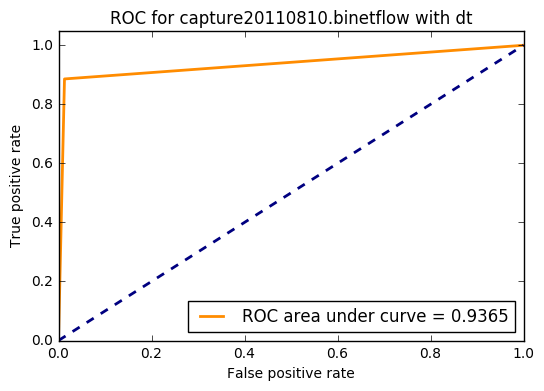

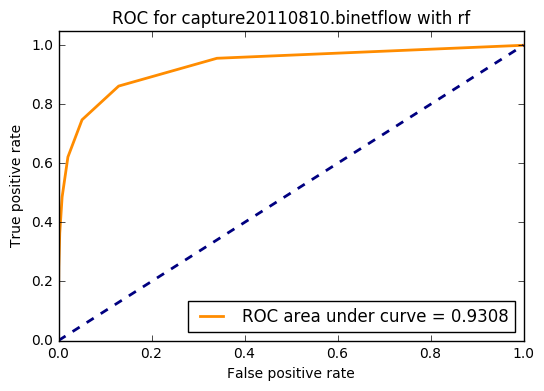

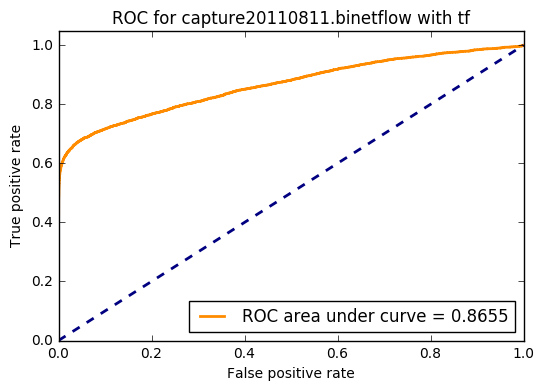

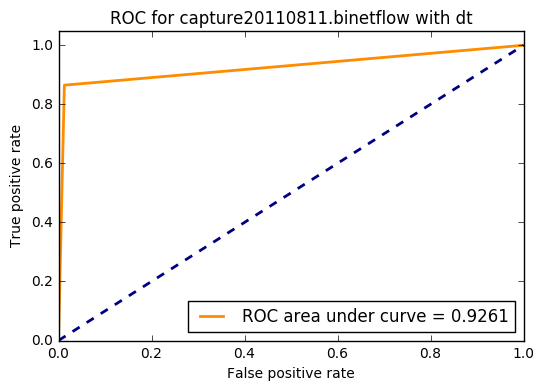

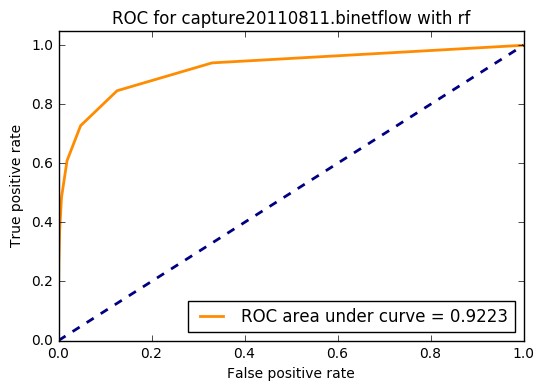

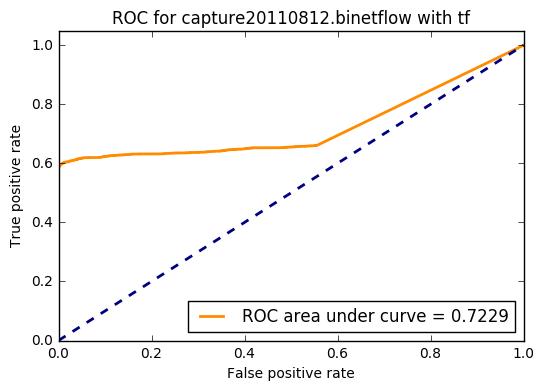

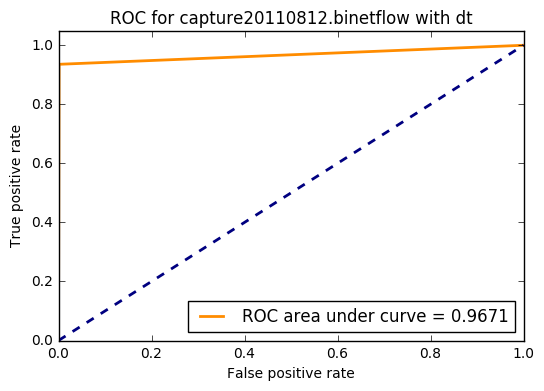

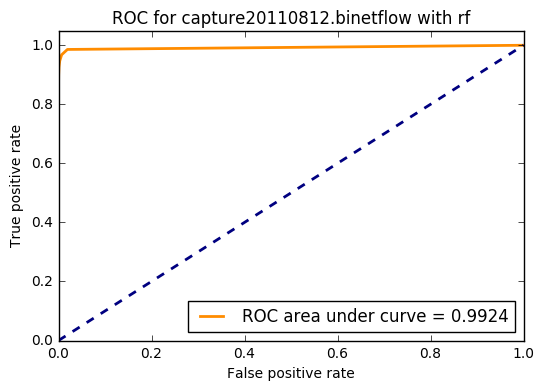

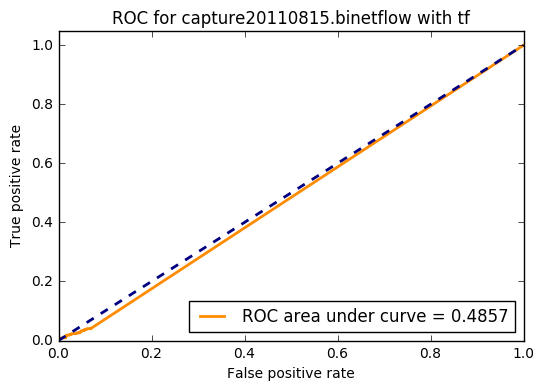

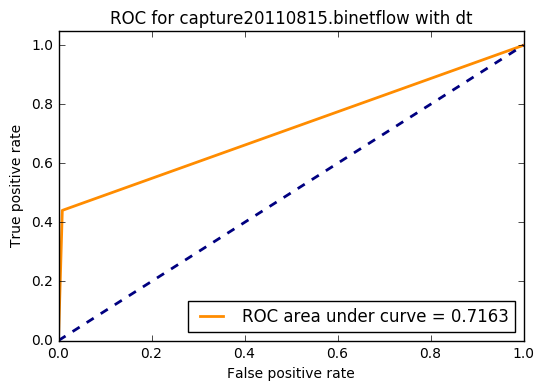

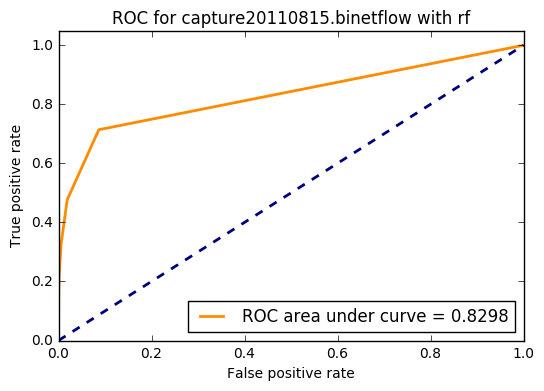

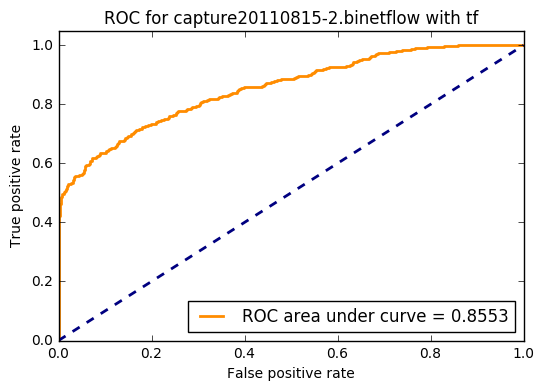

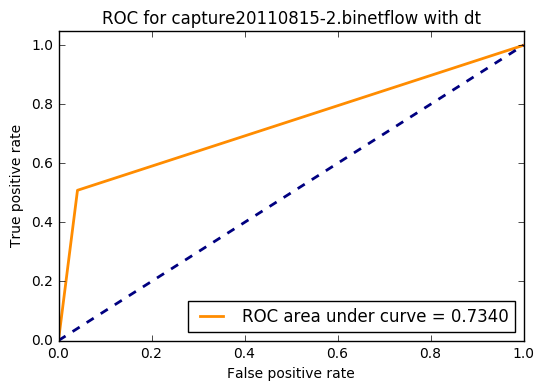

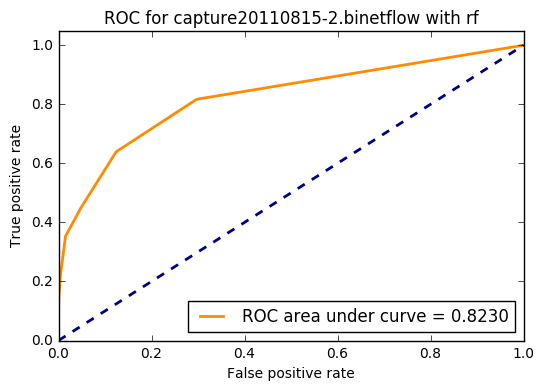

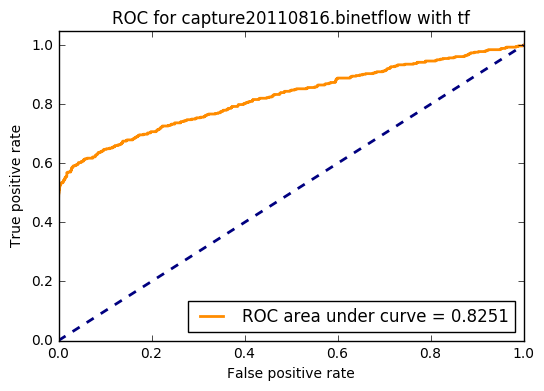

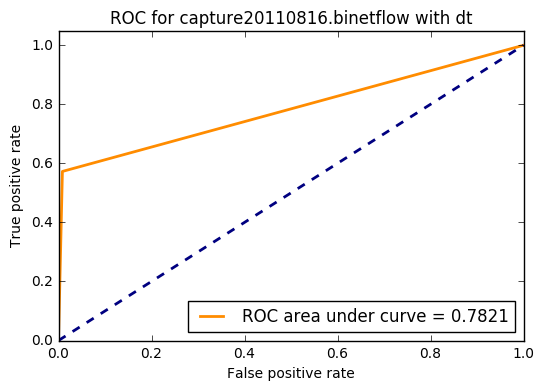

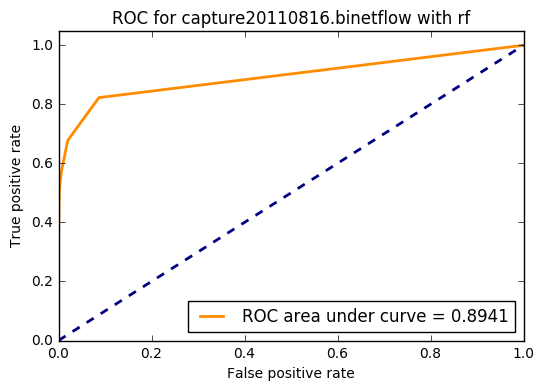

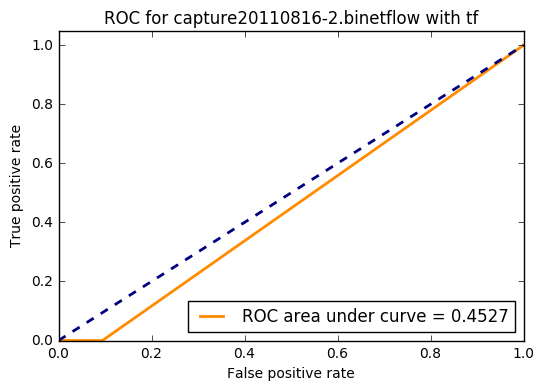

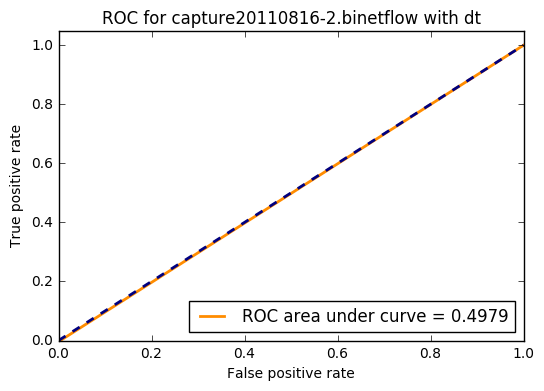

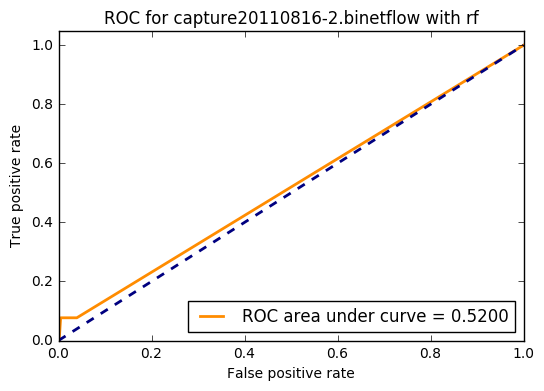

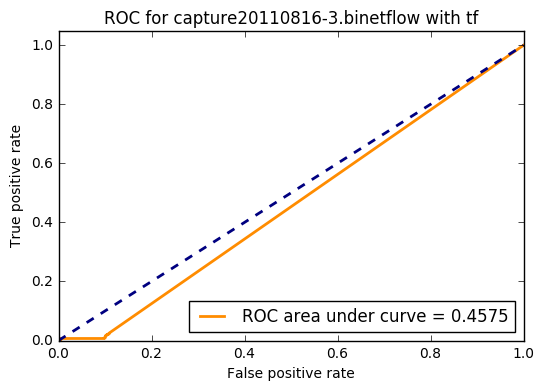

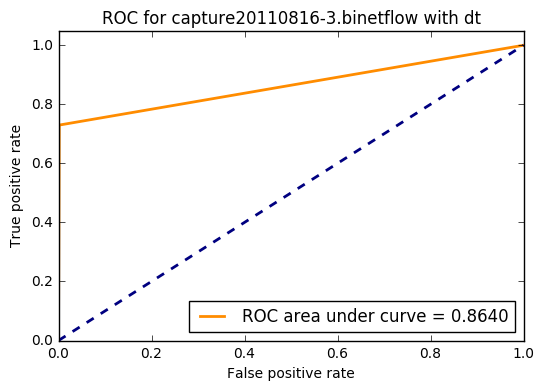

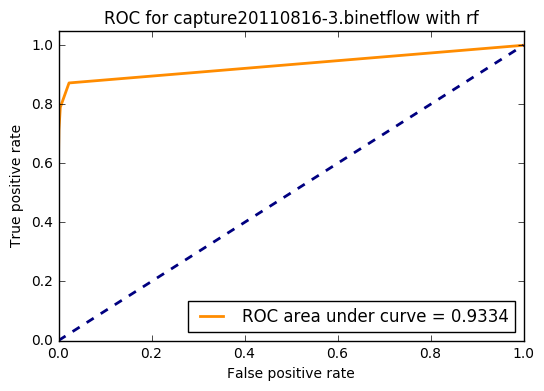

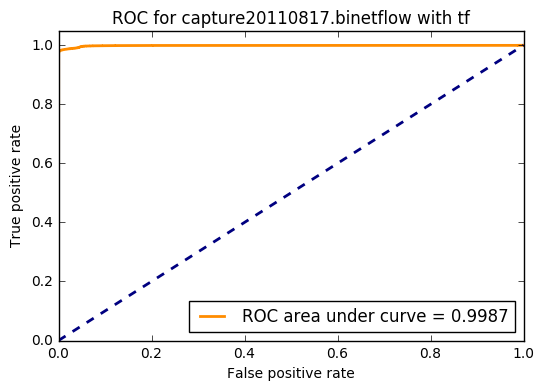

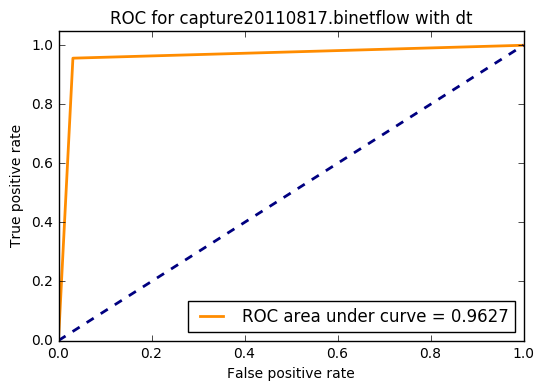

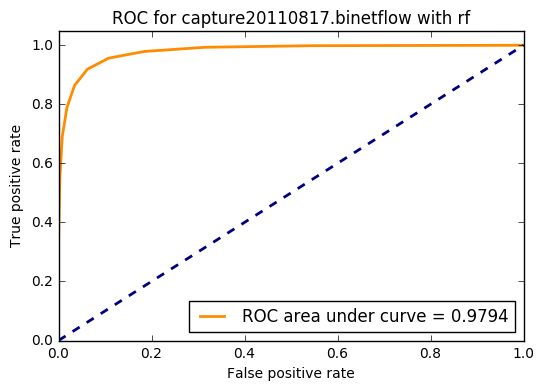

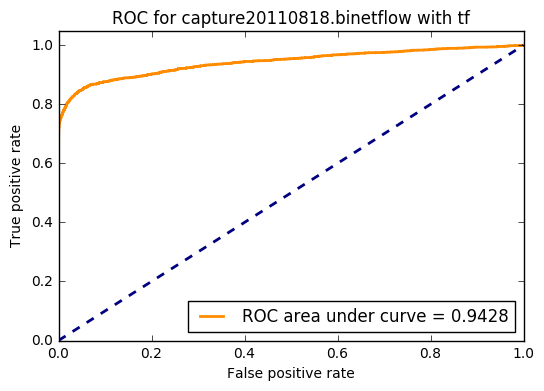

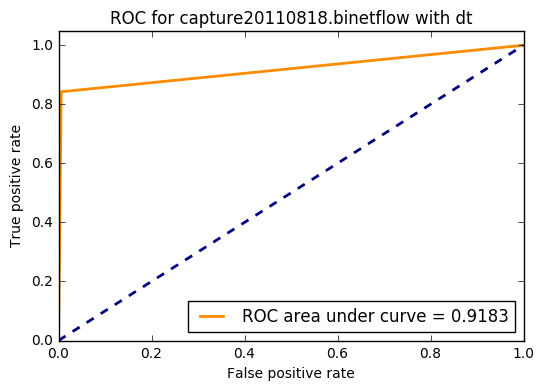

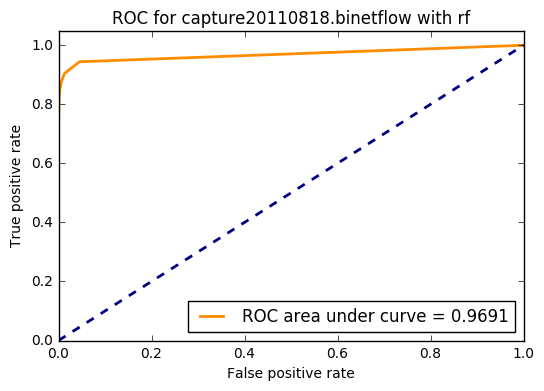

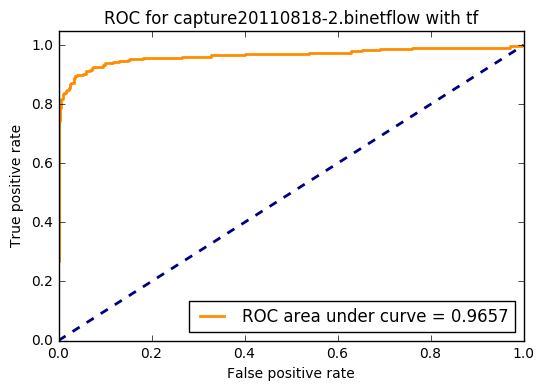

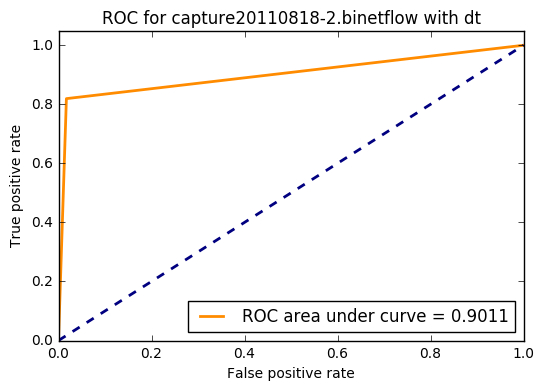

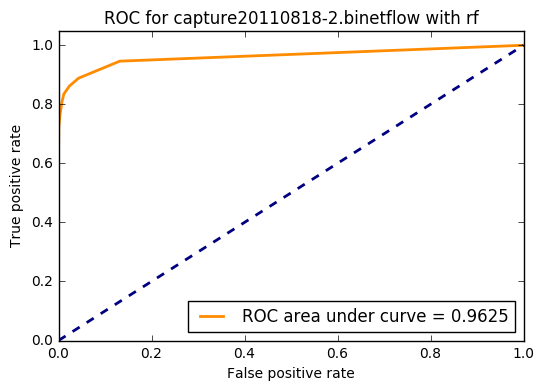

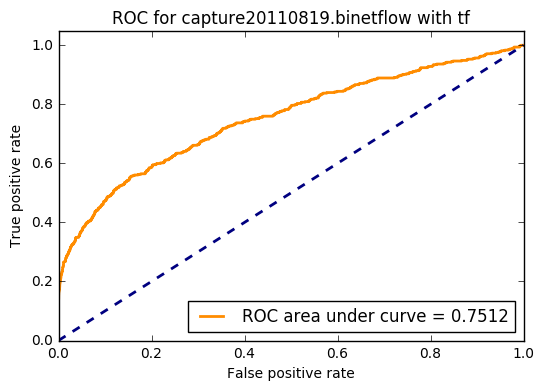

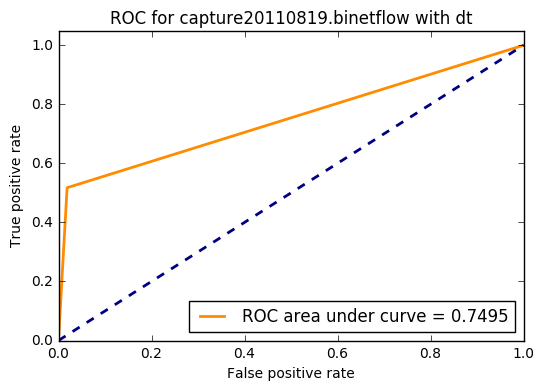

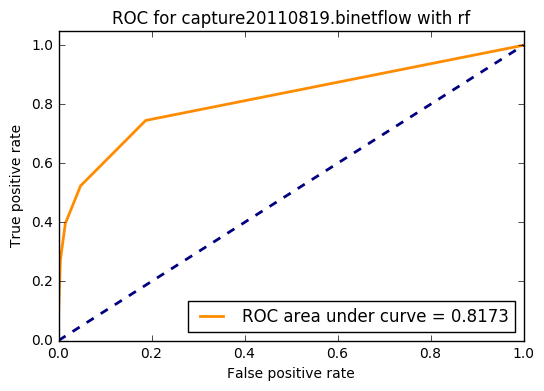

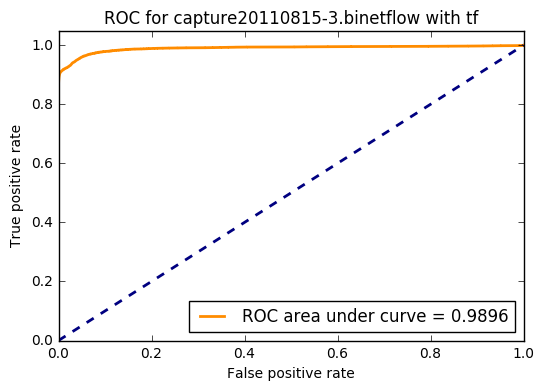

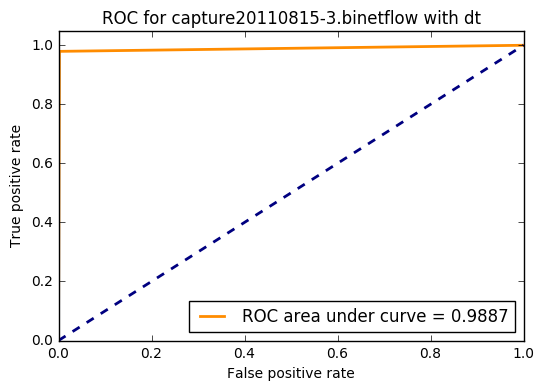

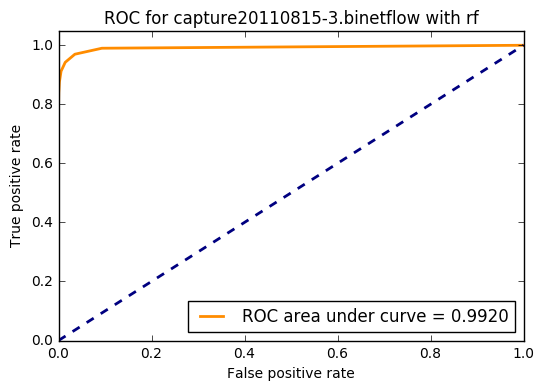

In [7]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.15, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)
    

0.951894481146 0.783513772807 0.471355969658


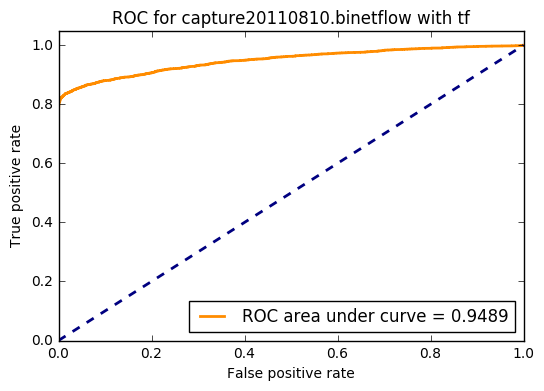

0.984154010307 0.914730538922 0.917808219178


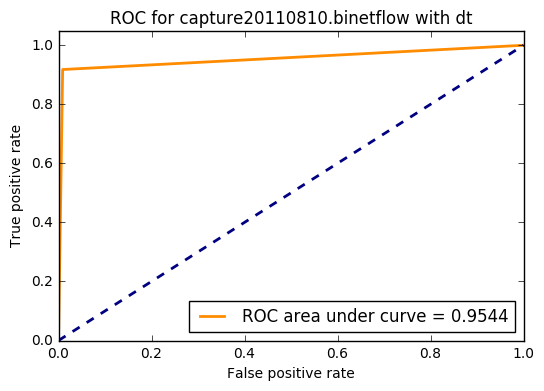

0.93952189607 0.941072480849 0.38380197068


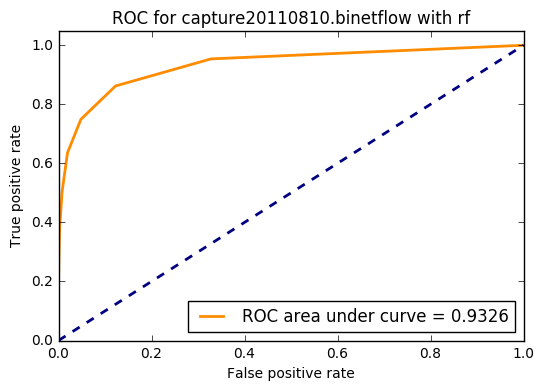

0.953825946399 0.758588134142 0.473845336599


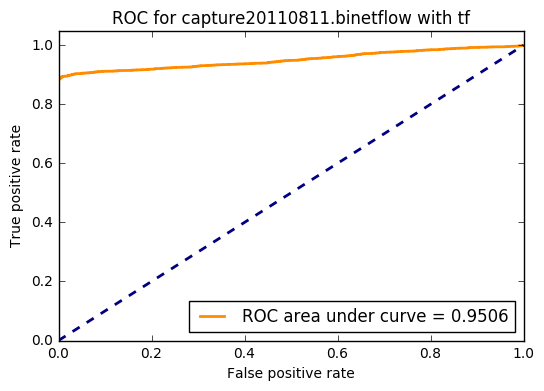

0.977771790381 0.880323054332 0.877745241581


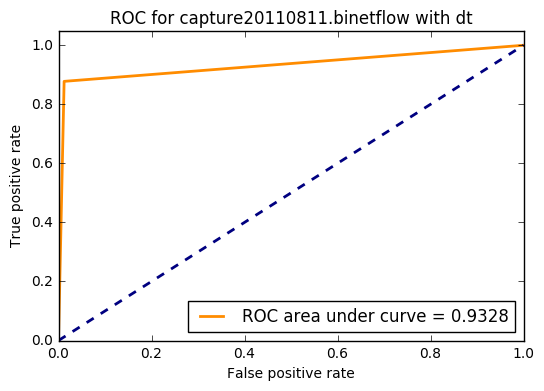

0.944025326687 0.954931972789 0.411054172767


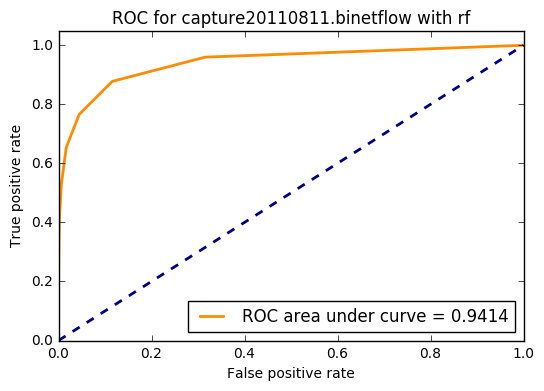

0.990482933647 0.359276117265 0.314212594766


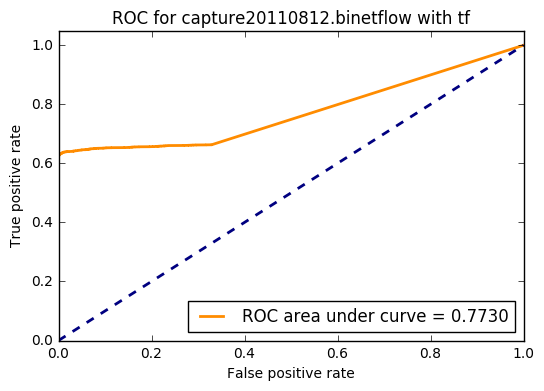

0.997486636261 0.947347740668 0.945366618743


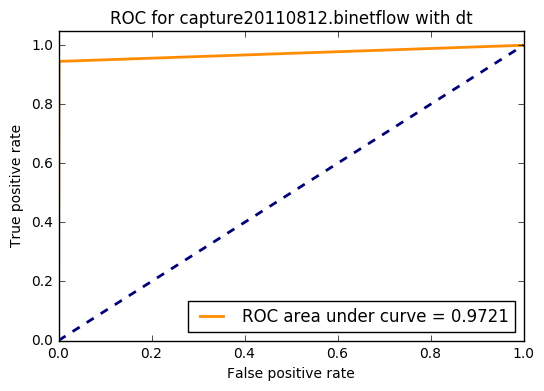

0.997082046001 0.993662490789 0.881192001046


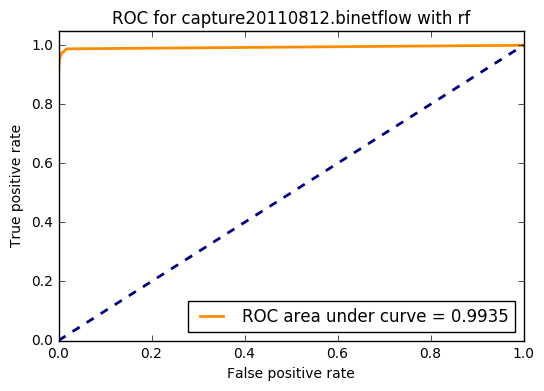

0.984482124344 0.0 0.0


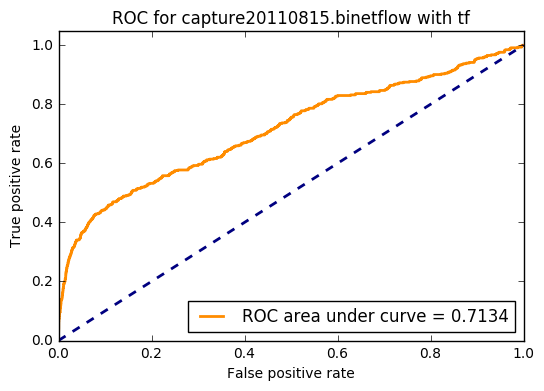

0.98765927561 0.606741573034 0.581896551724


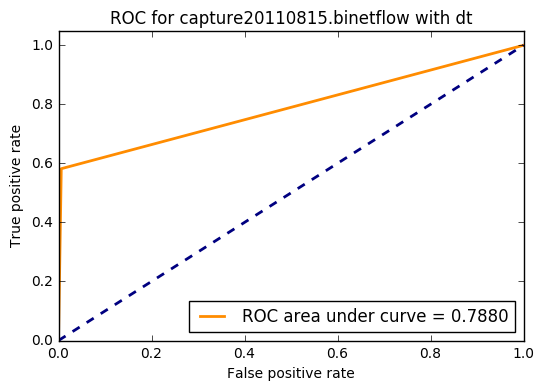

0.986053978128 0.927272727273 0.109913793103


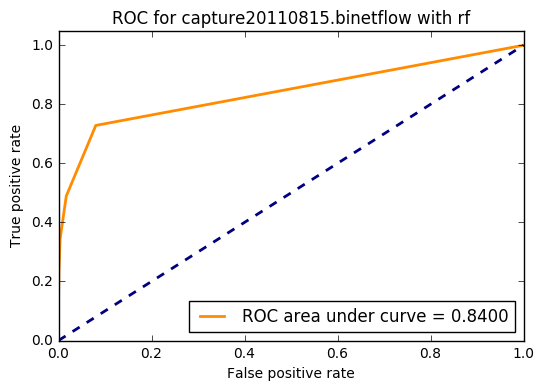

0.930928411766 0.0 0.0


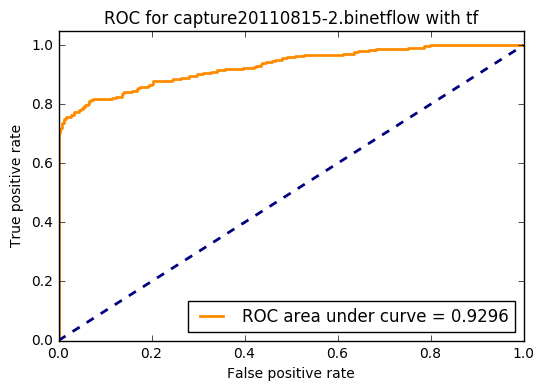

0.94966442953 0.63137254902 0.651821862348


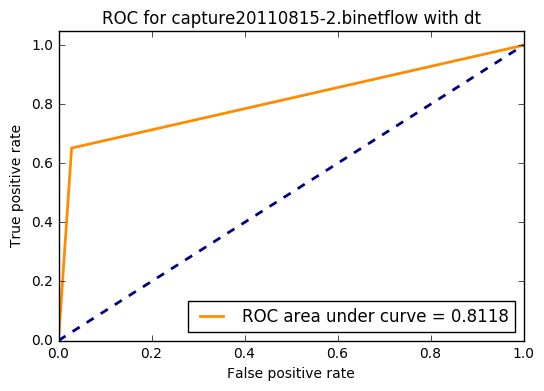

0.938199105145 0.825 0.133603238866


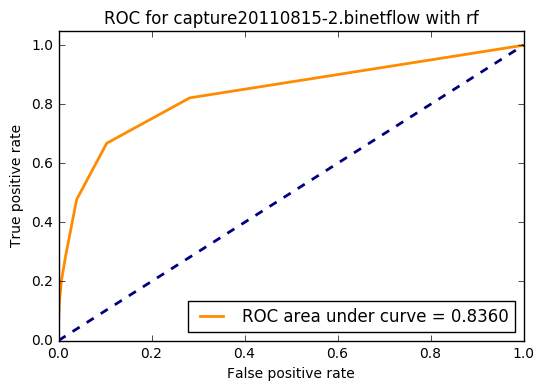

0.98804066175 0.163710034747 0.131995648453


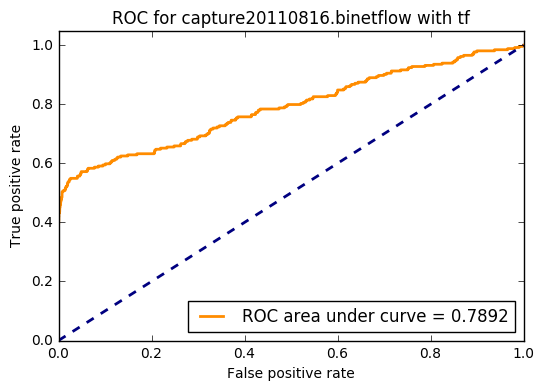

0.984785064115 0.562724014337 0.594696969697


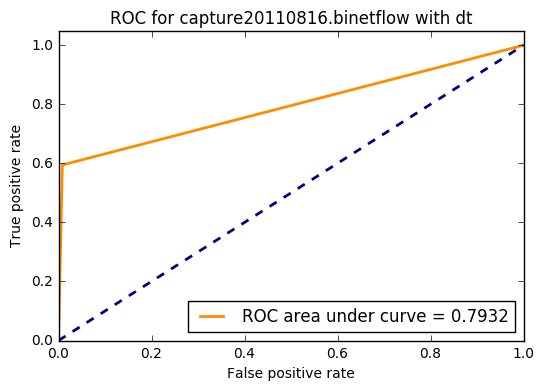

0.988173543286 0.938775510204 0.348484848485


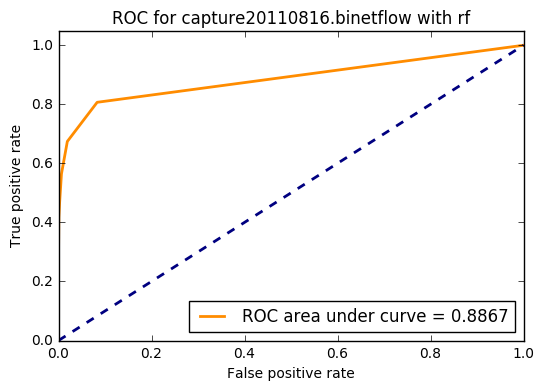

0.996761133603 0.0 0.0


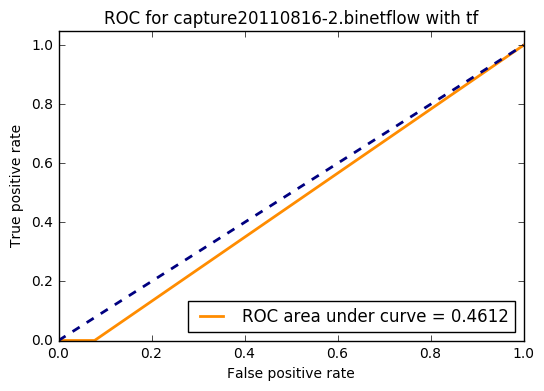

0.994331983806 0.0 0.0


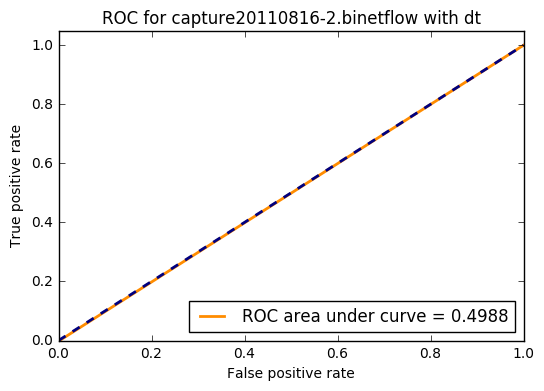

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.996761133603 0.0 0.0


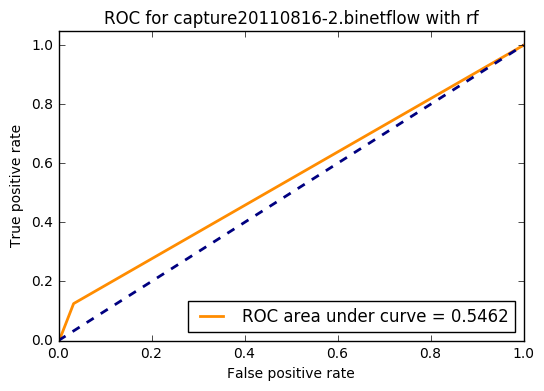

0.993273697547 0.0 0.0


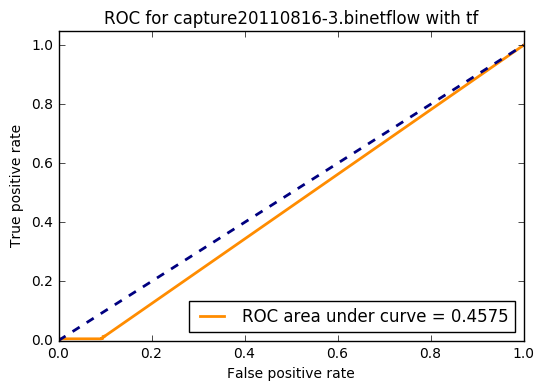

0.997066840711 0.787878787879 0.771689497717


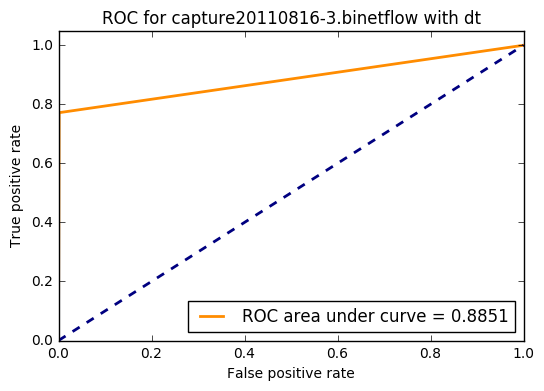

0.996905593734 0.991683991684 0.544520547945


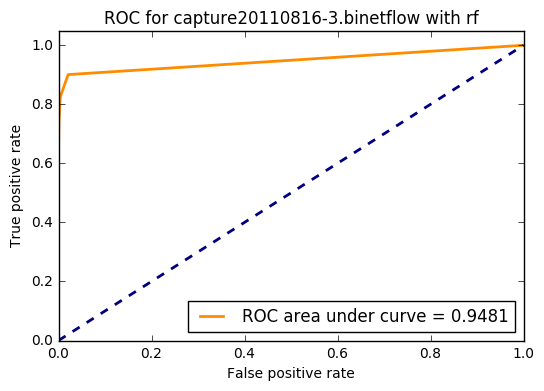

0.956354954643 1.0 0.890834772921


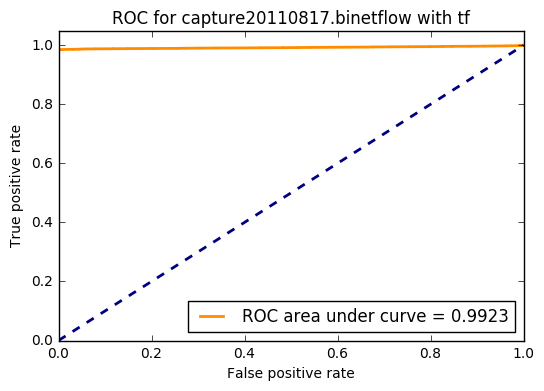

0.970921186759 0.964586395831 0.963042028019


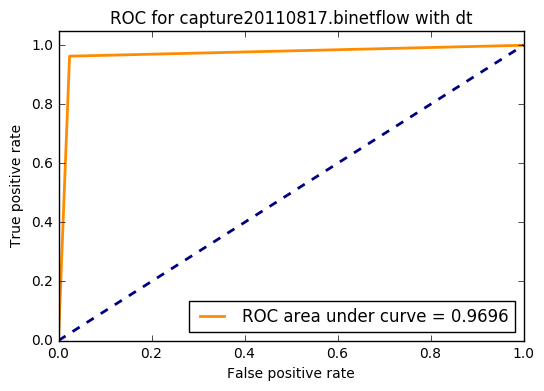

0.927356617844 0.940215053763 0.874983322215


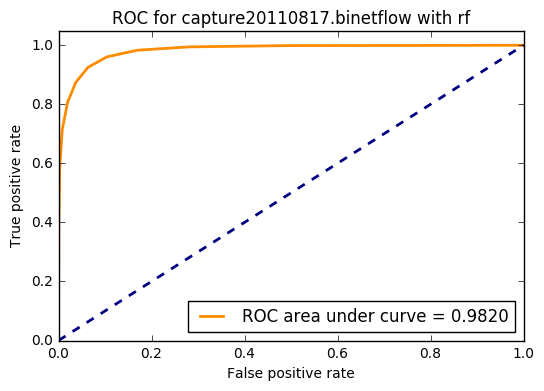

0.989662427957 0.617121493919 0.545740419267


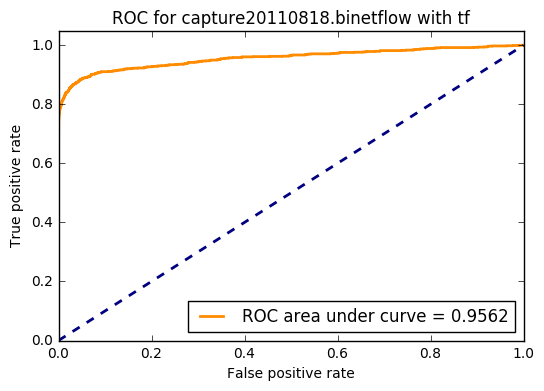

0.989662427957 0.870737509913 0.861852433281


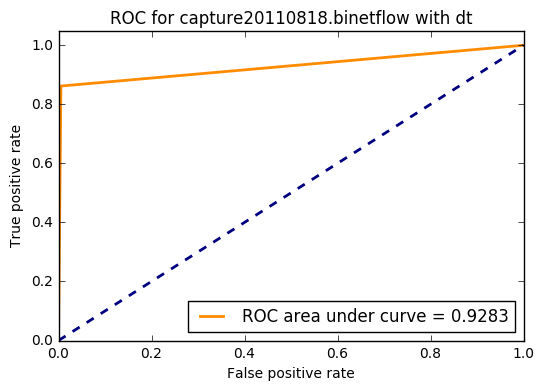

0.991187143598 0.968601332065 0.799058084772


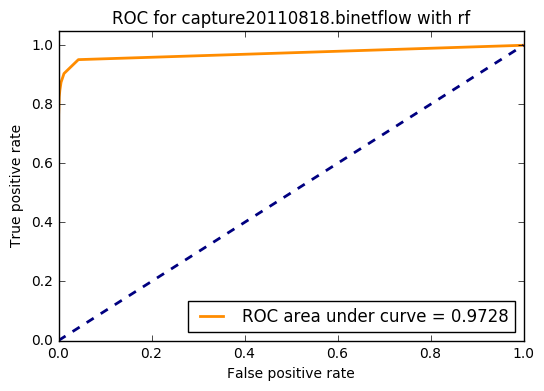

0.979797979798 0.832398037852 0.733034035172


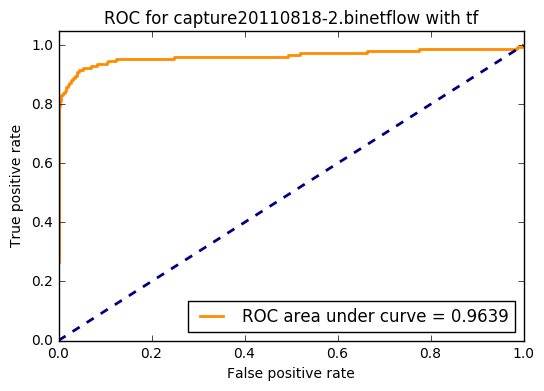

0.970258136925 0.849315068493 0.8


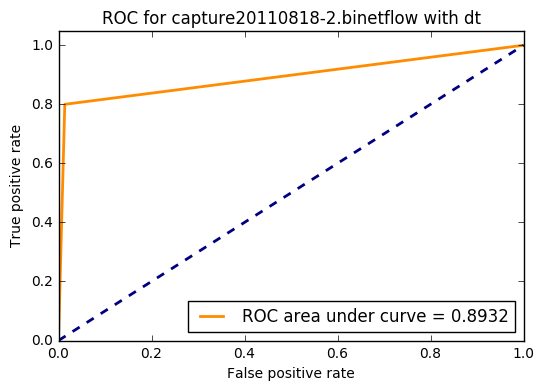

0.974747474747 0.950819672131 0.748387096774


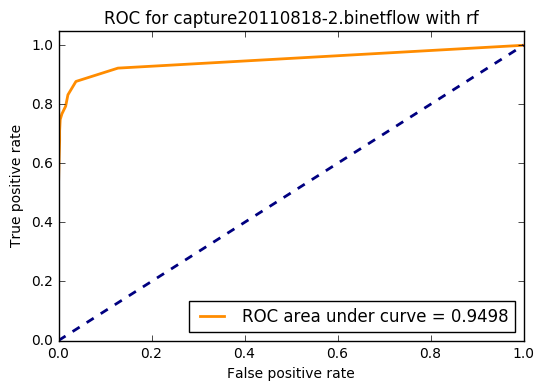

0.966769794889 0.0 0.0


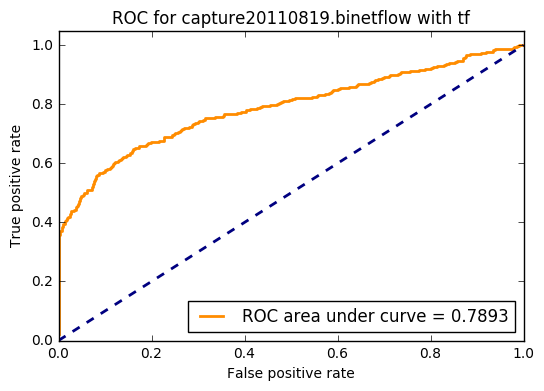

0.969405293915 0.539249146758 0.544827586207


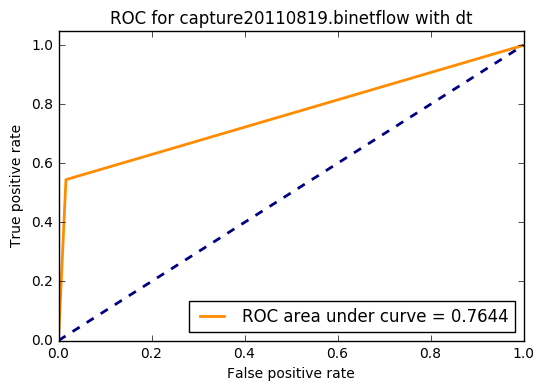

0.97226996677 0.928571428571 0.179310344828


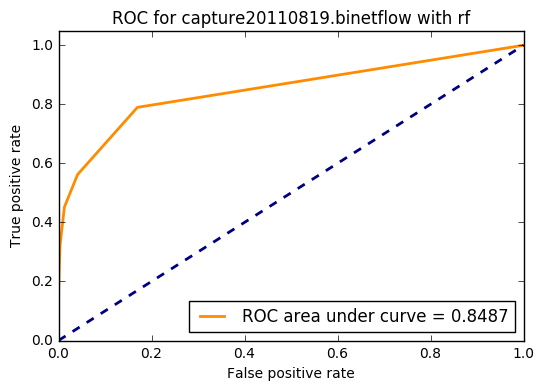

0.985950155191 0.919759750787 0.804777079805


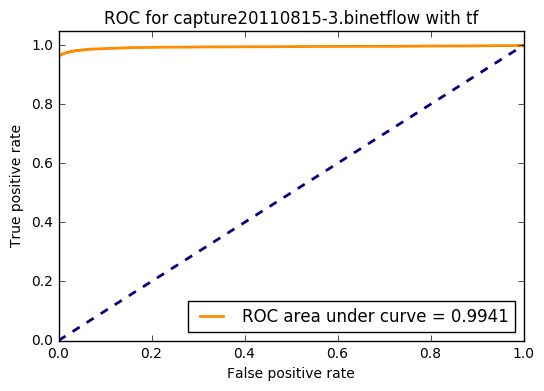

0.996758434498 0.982262751779 0.982361194628


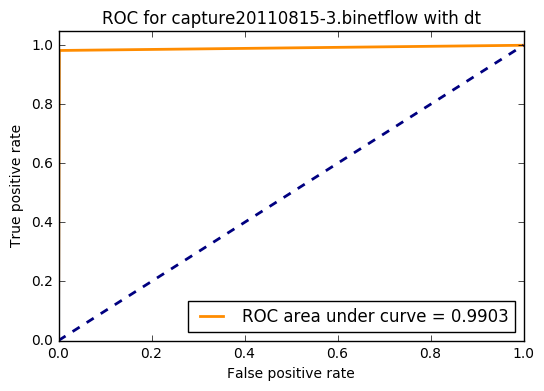

0.9863266543 0.988828745825 0.860493084787


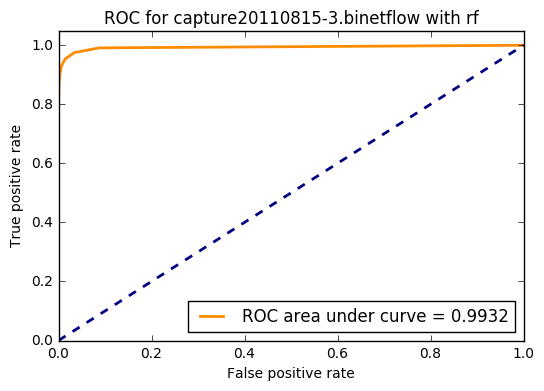

In [6]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.15, binet))
    plot_roc_curve('tf', feature, label, binet, .3)
    plot_roc_curve('dt', feature, label, binet, .3)
    plot_roc_curve('rf', feature, label, binet, .3)

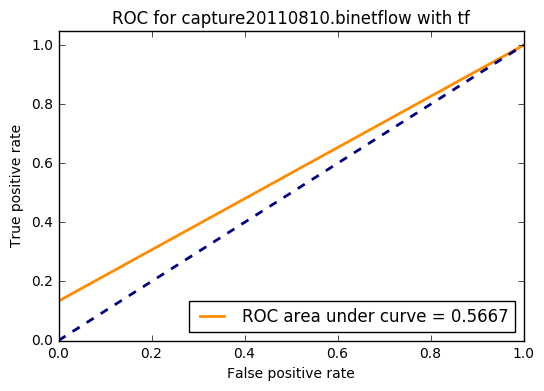

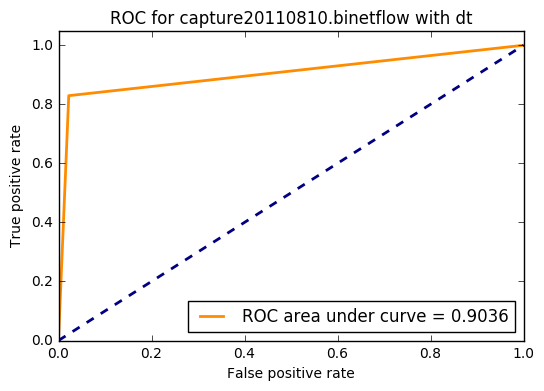

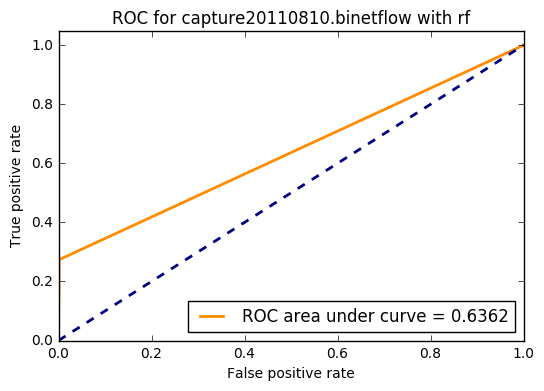

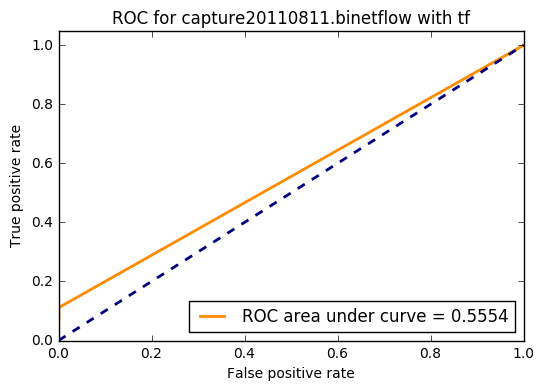

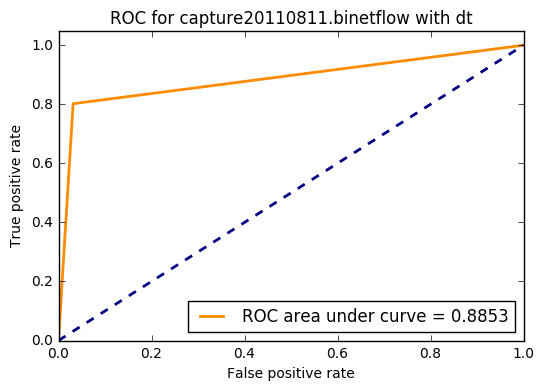

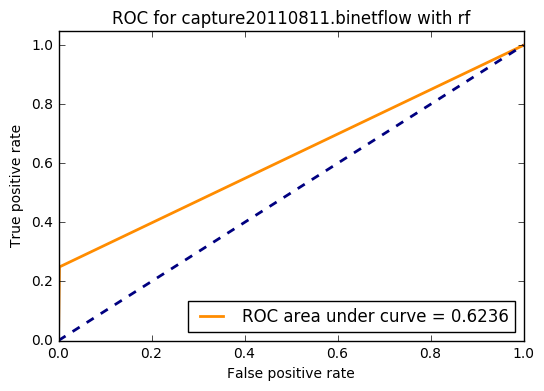

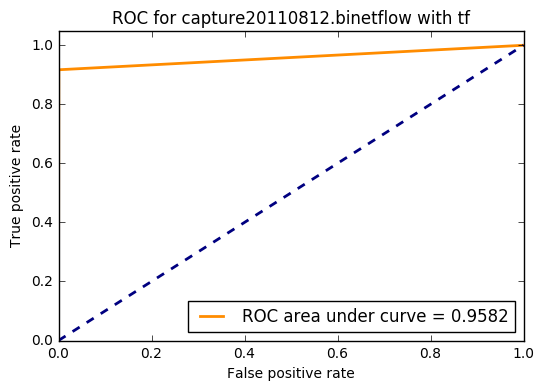

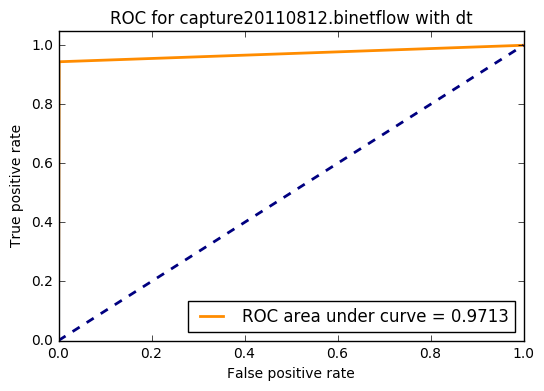

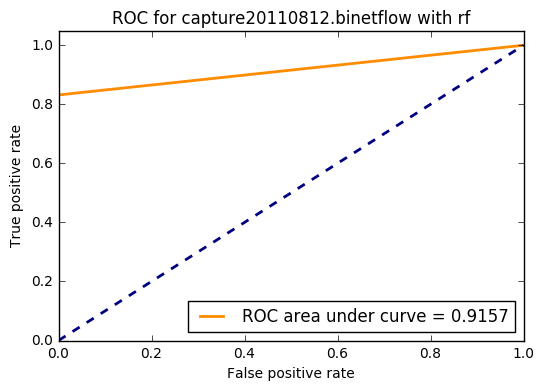

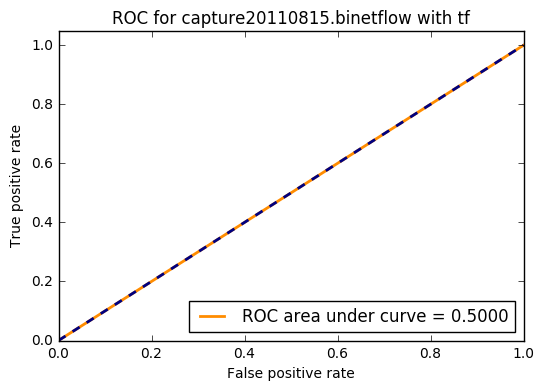

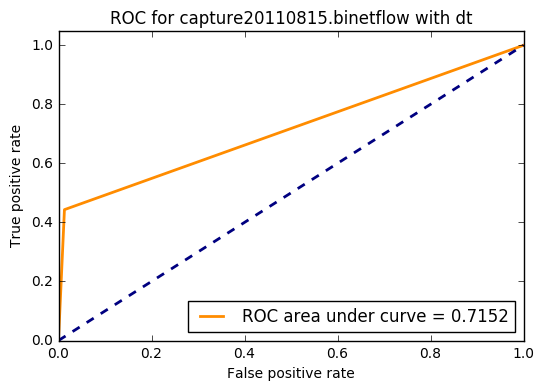

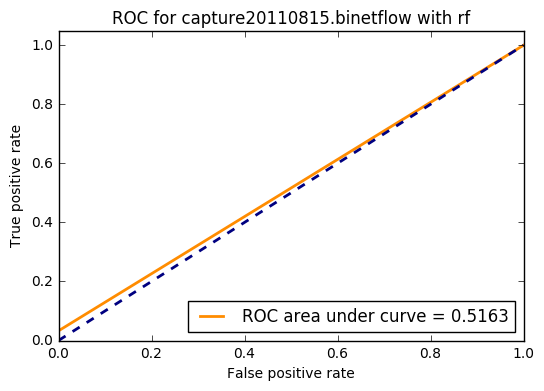

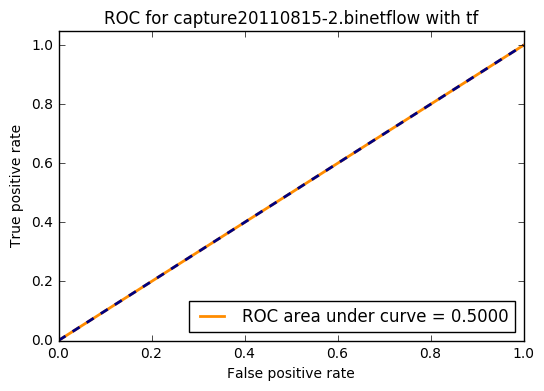

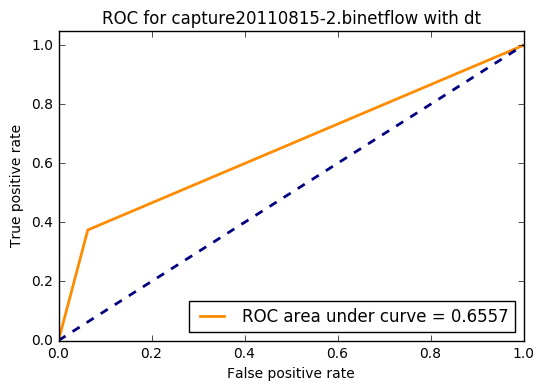

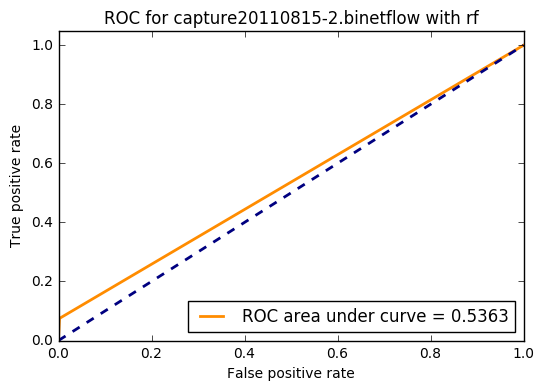

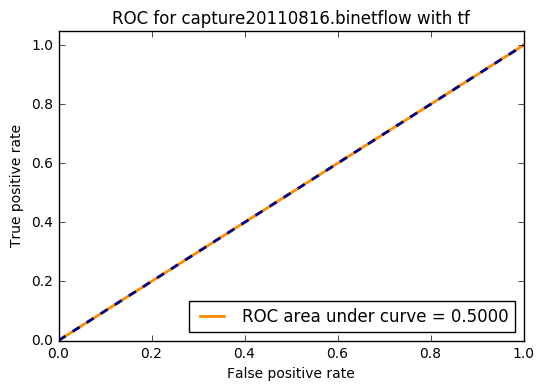

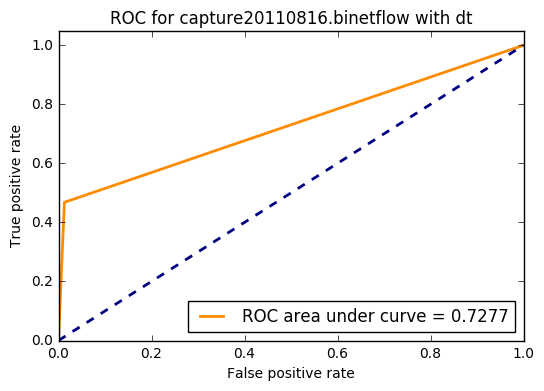

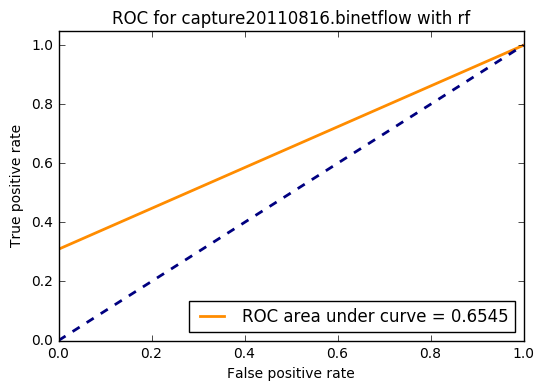

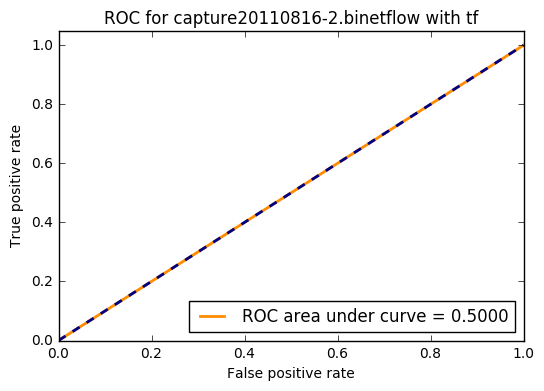

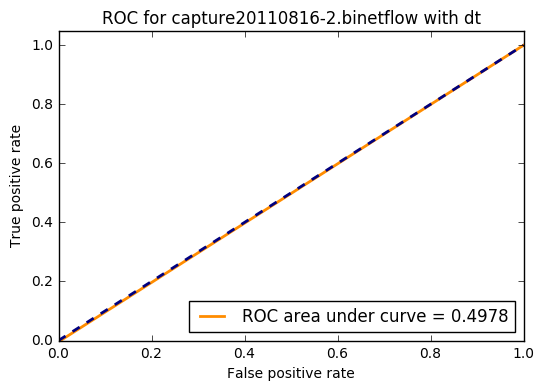

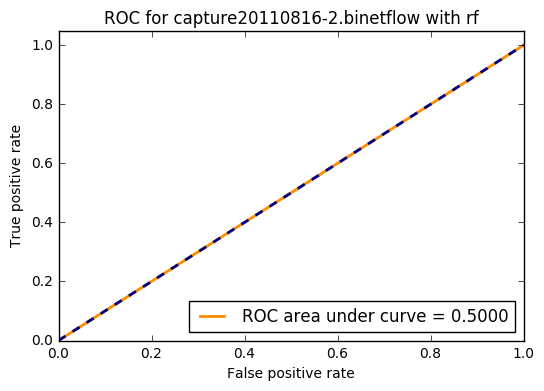

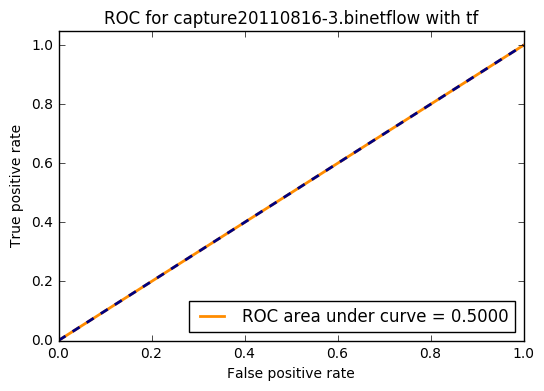

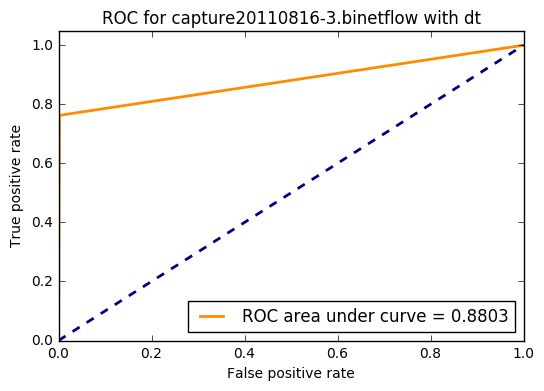

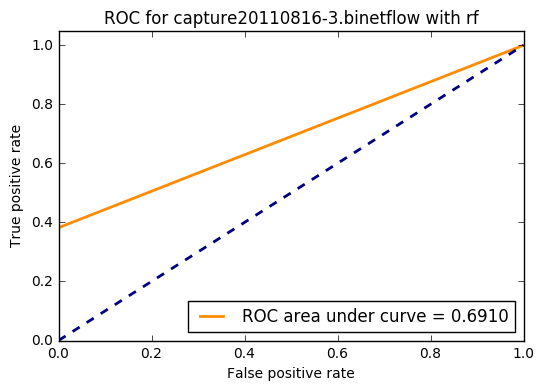

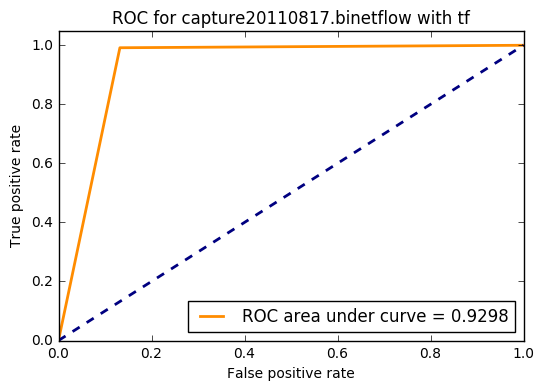

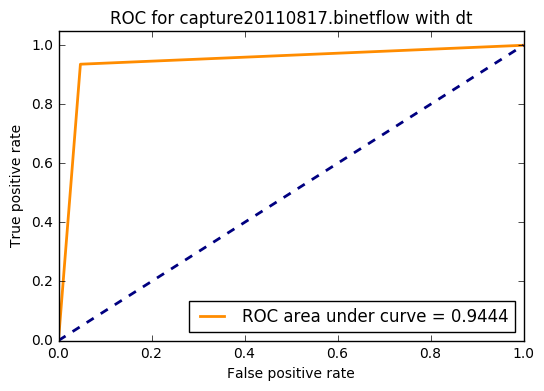

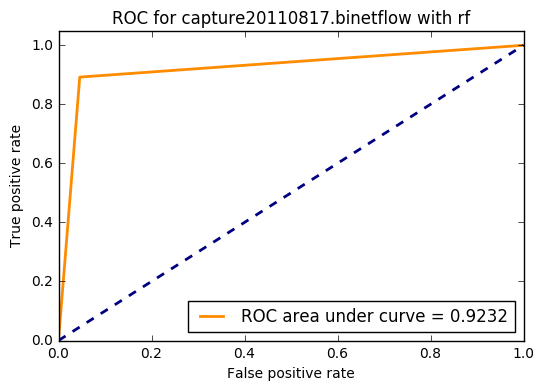

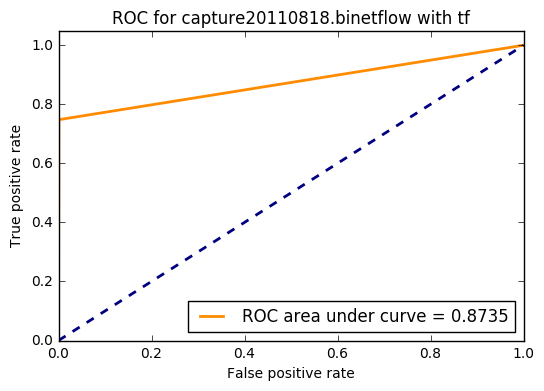

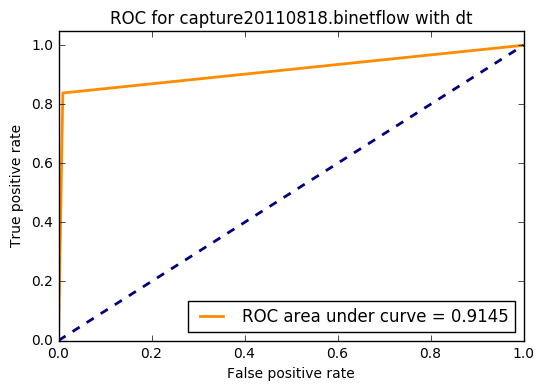

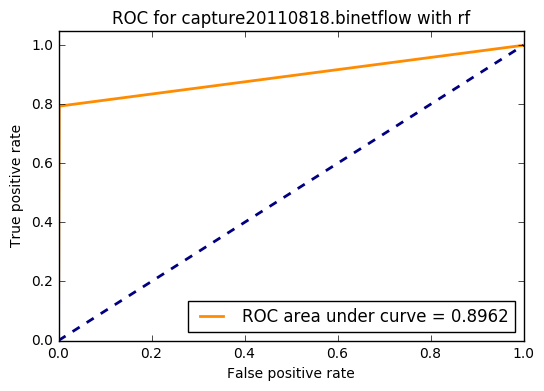

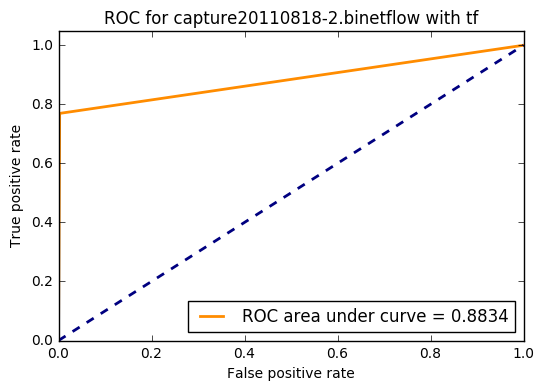

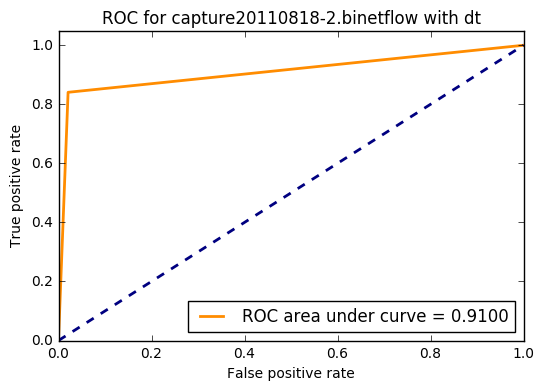

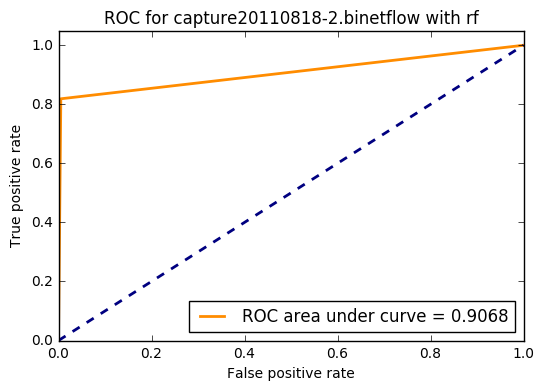

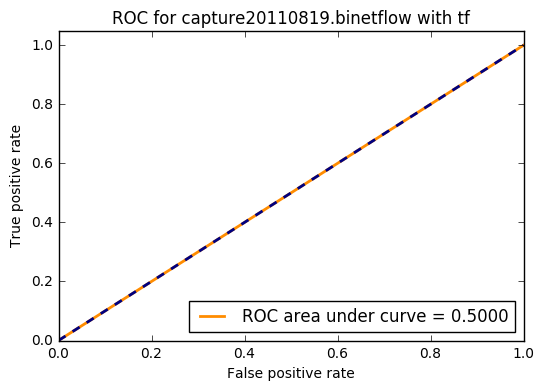

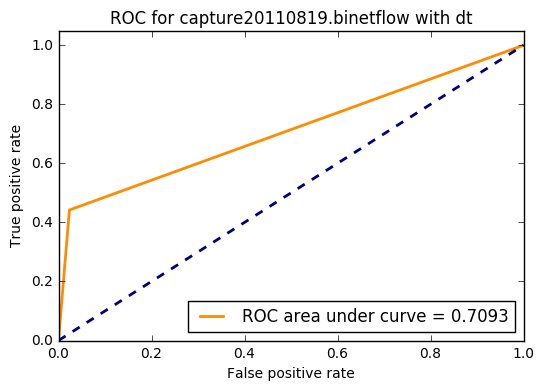

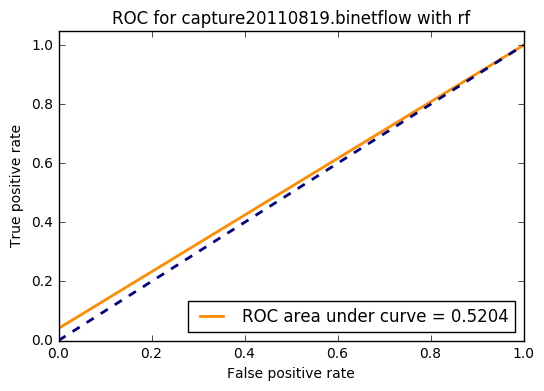

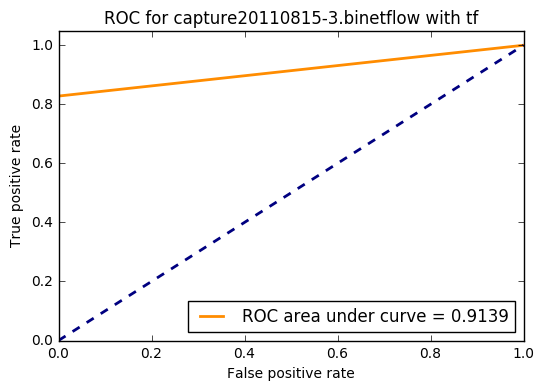

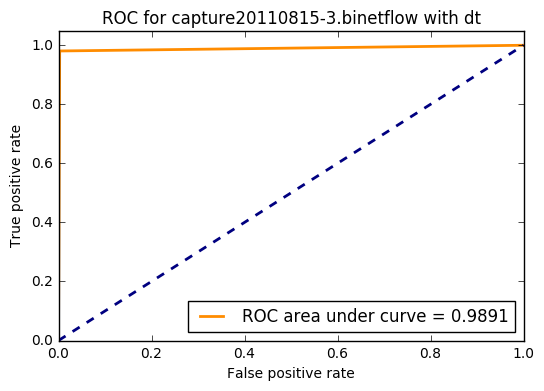

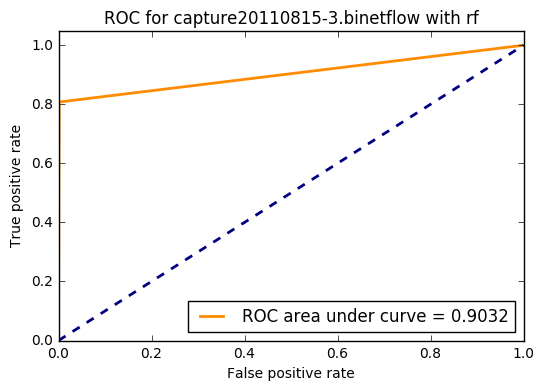

In [14]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.25, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)

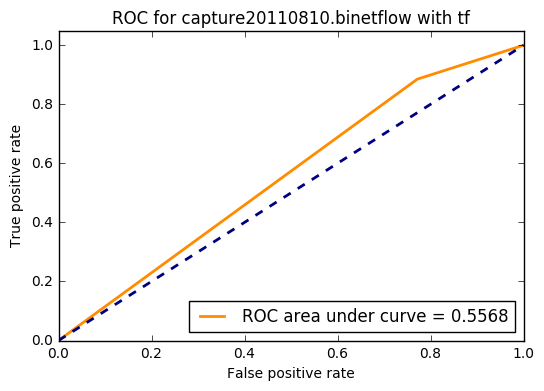

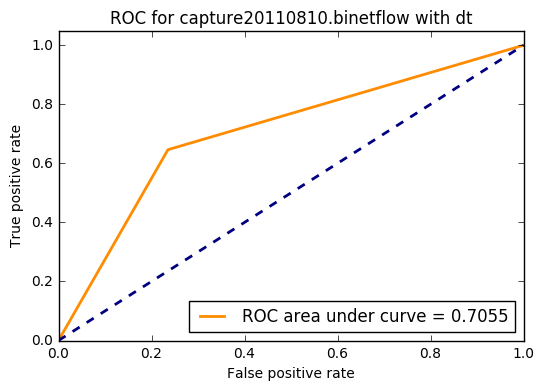

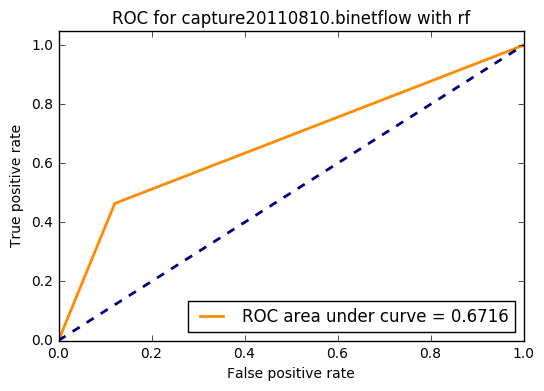

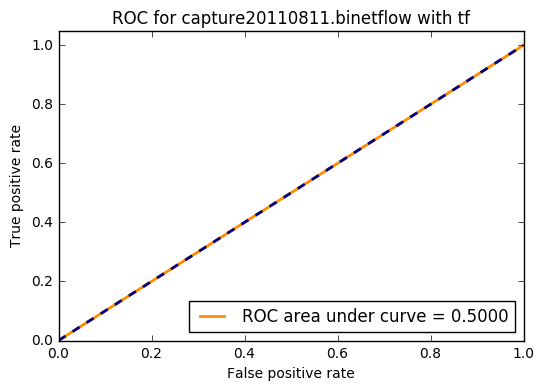

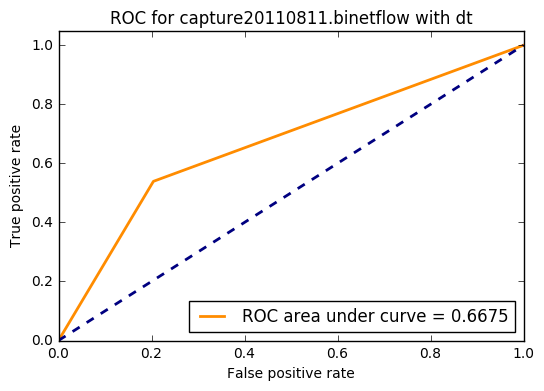

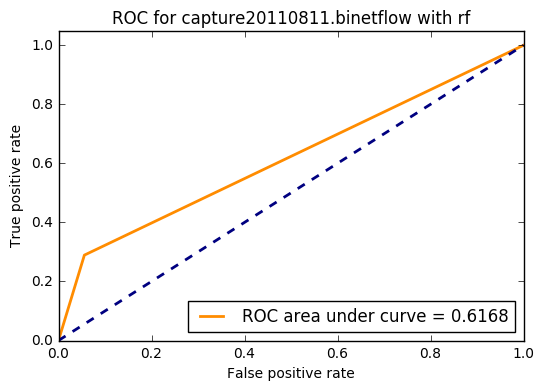

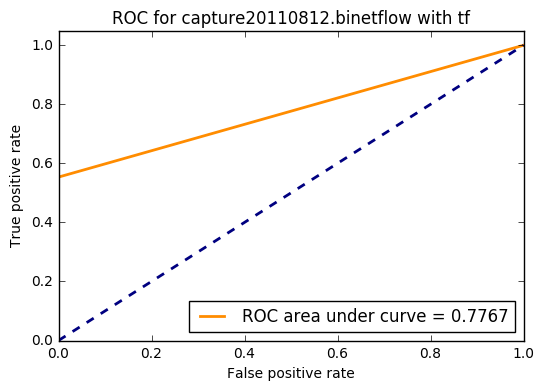

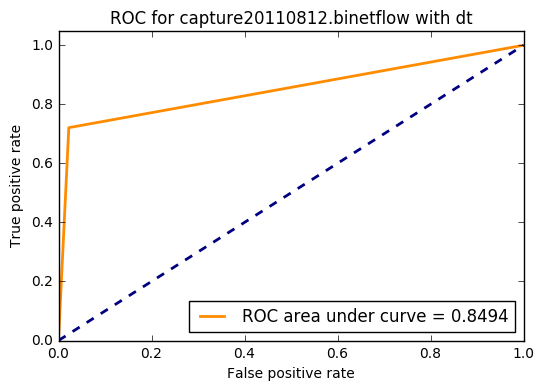

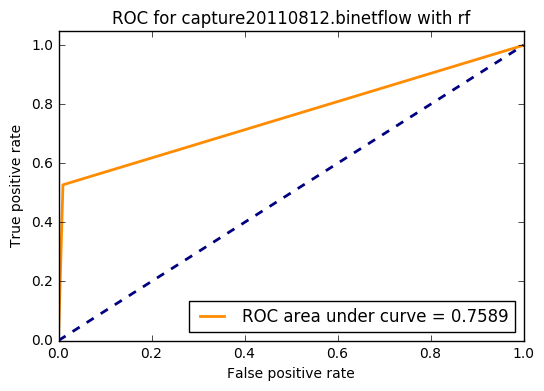

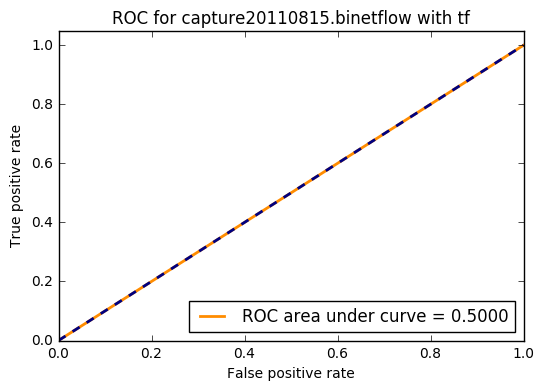

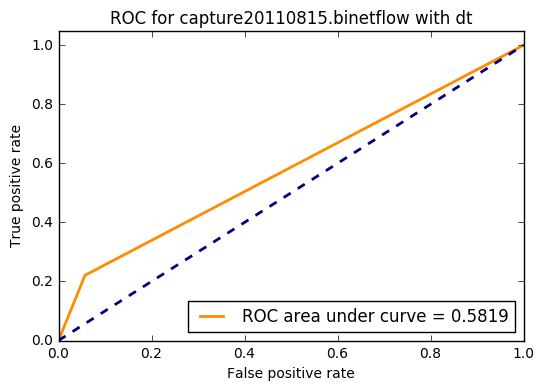

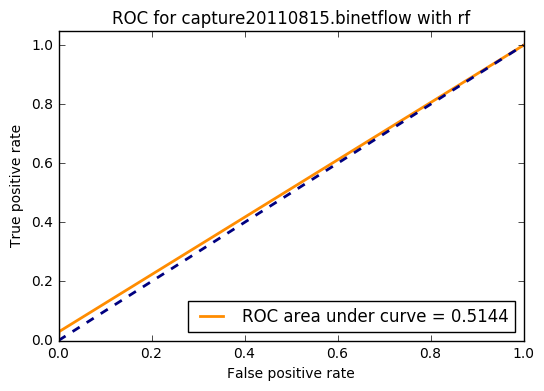

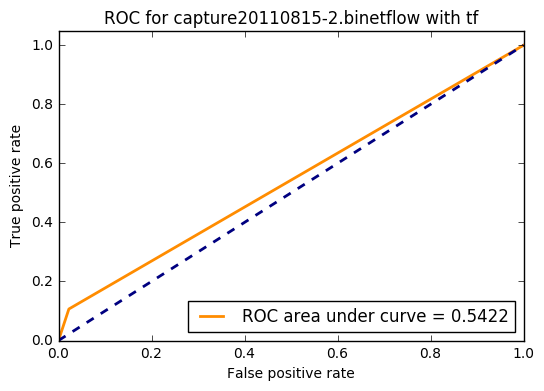

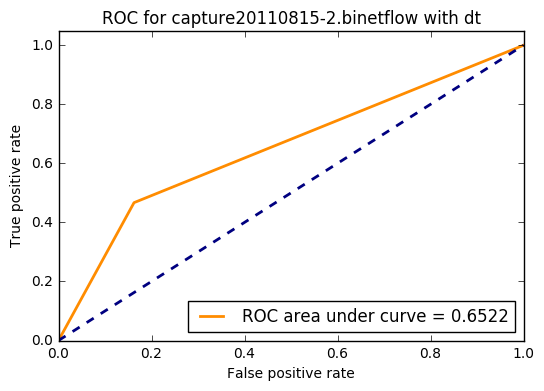

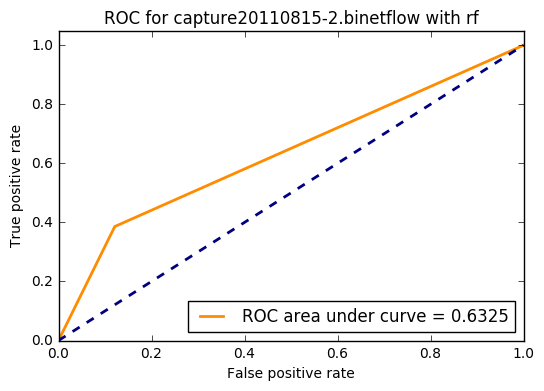

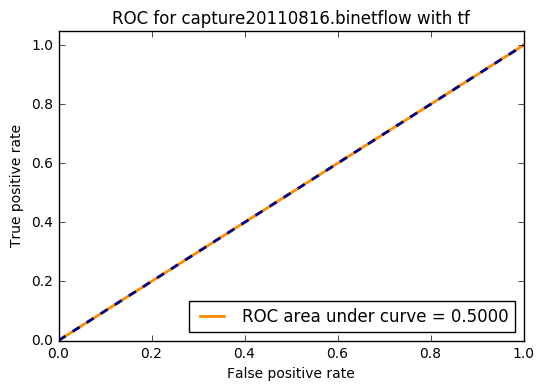

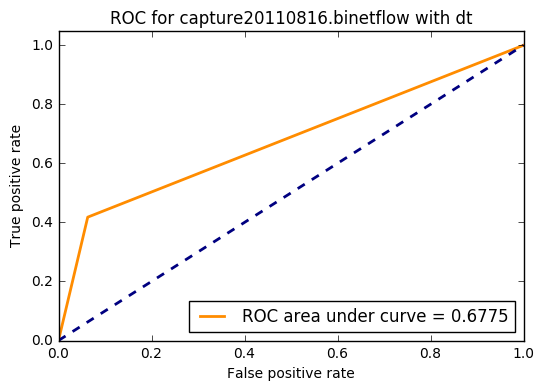

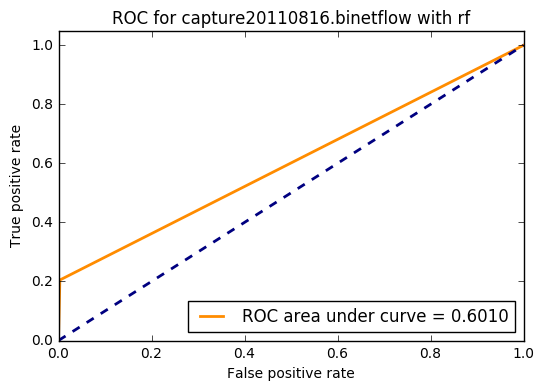

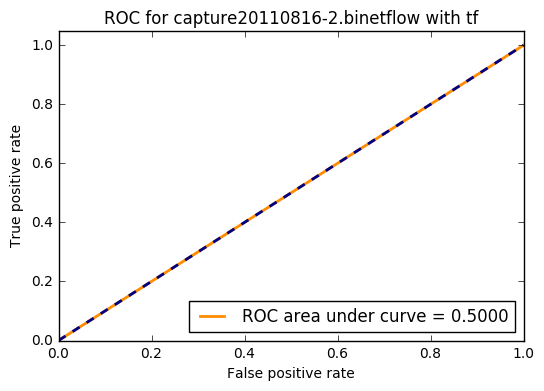

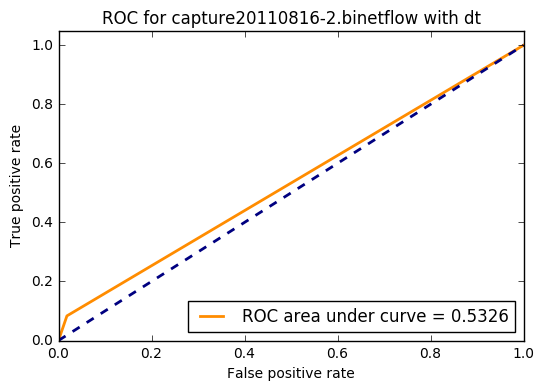

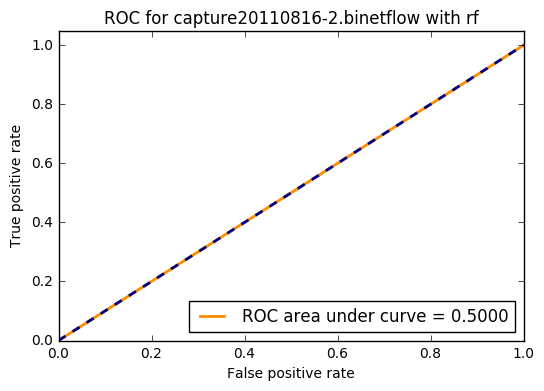

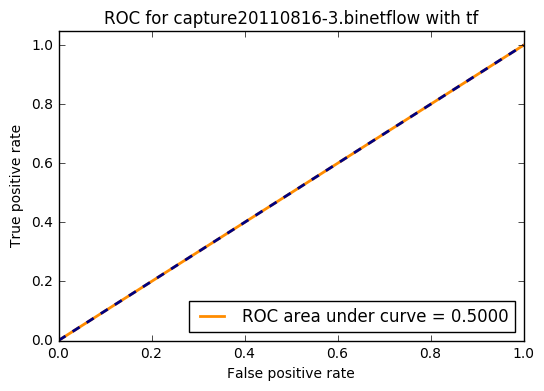

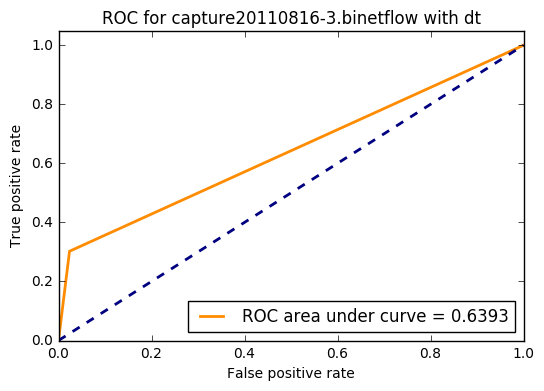

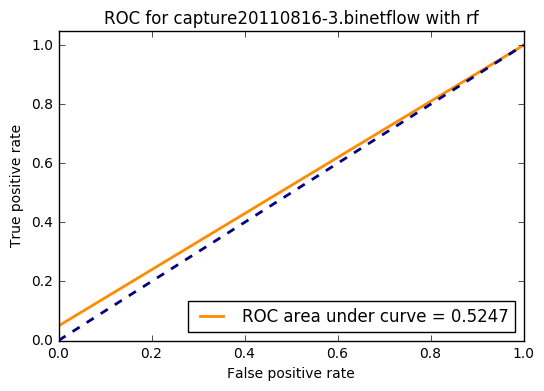

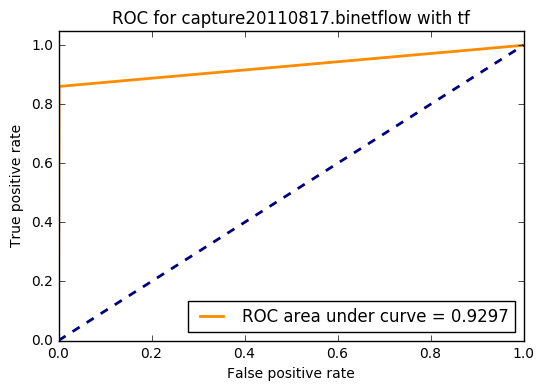

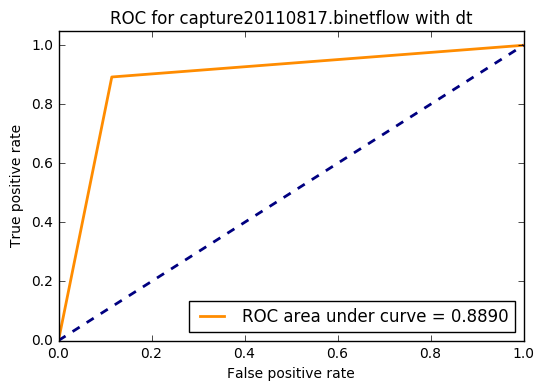

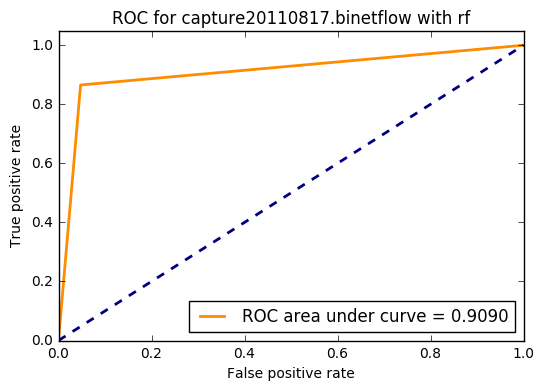

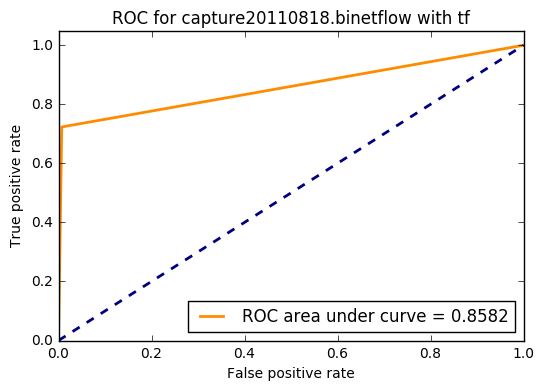

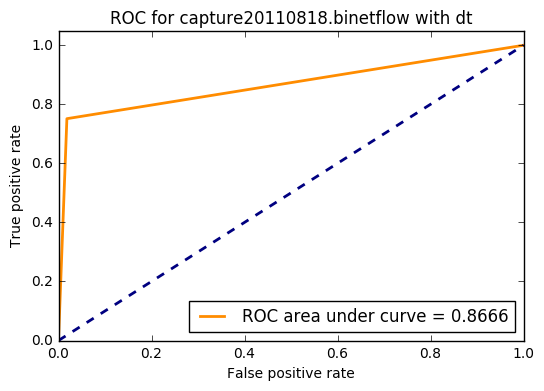

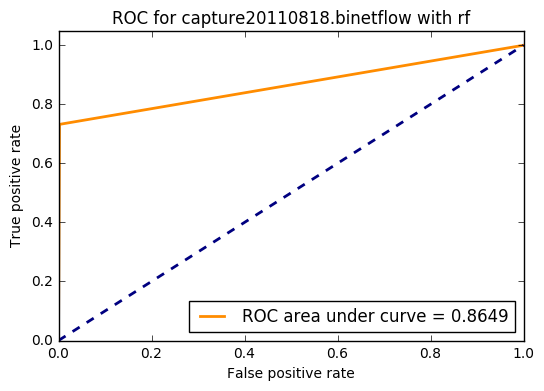

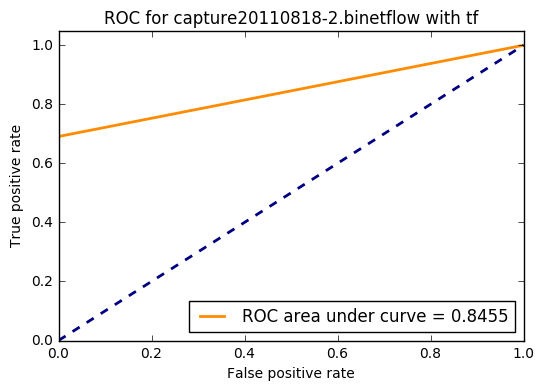

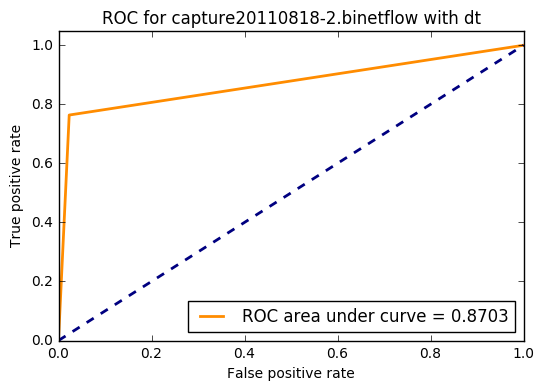

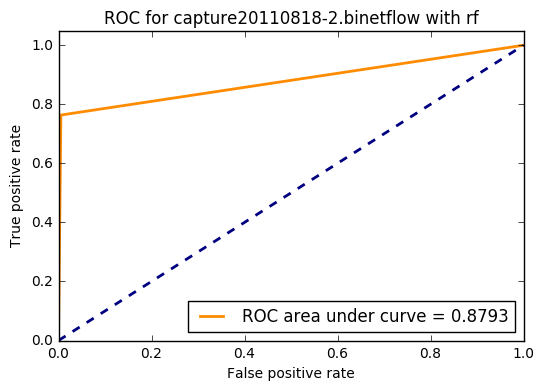

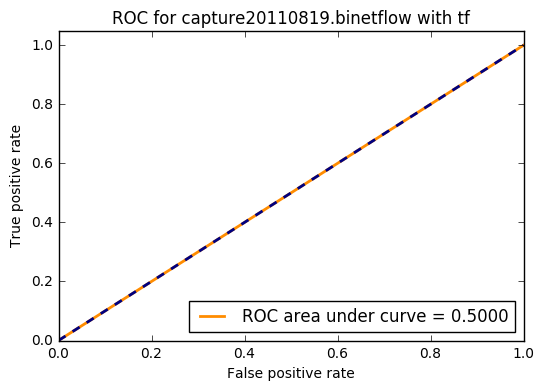

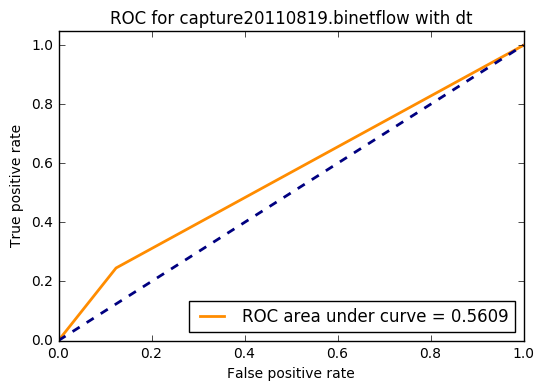

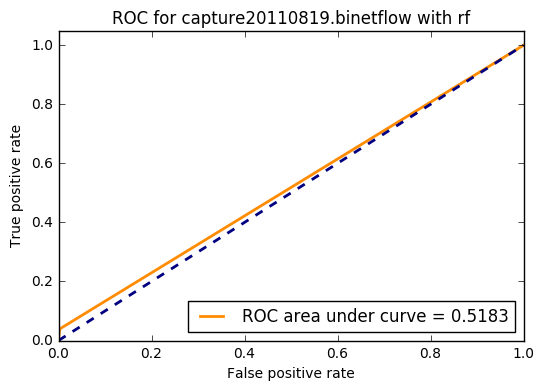

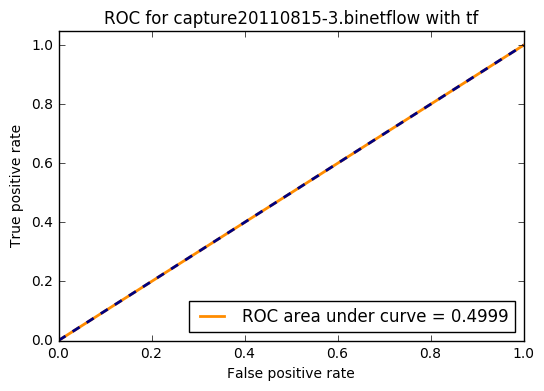

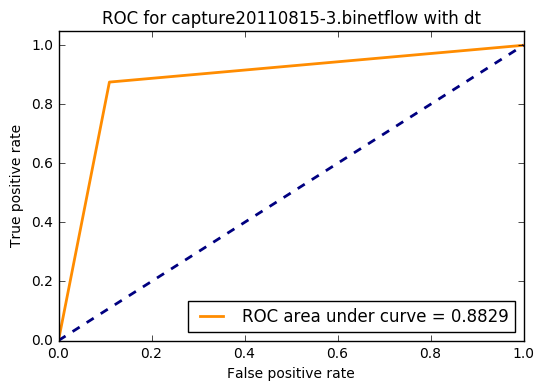

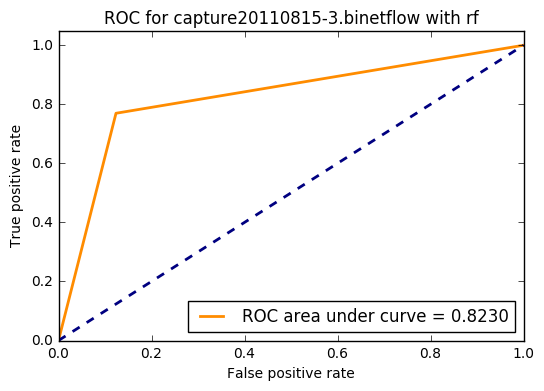

In [17]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(1, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)

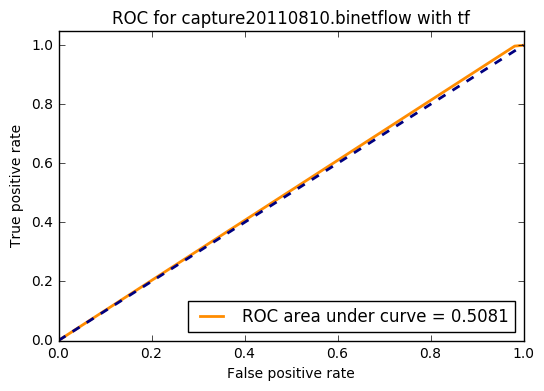

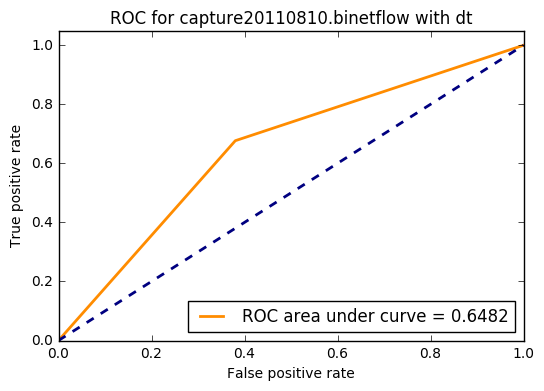

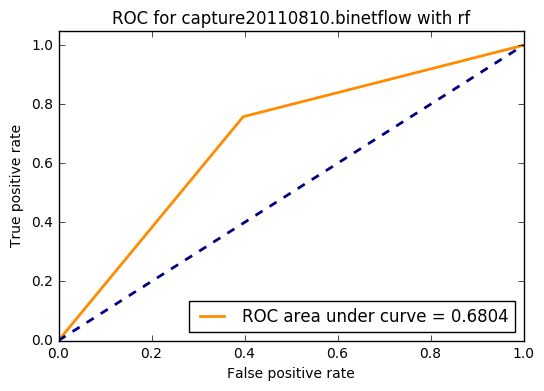

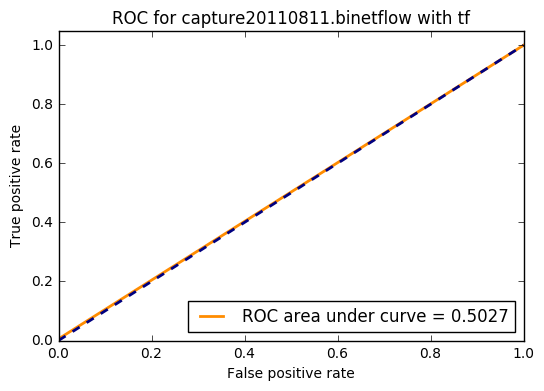

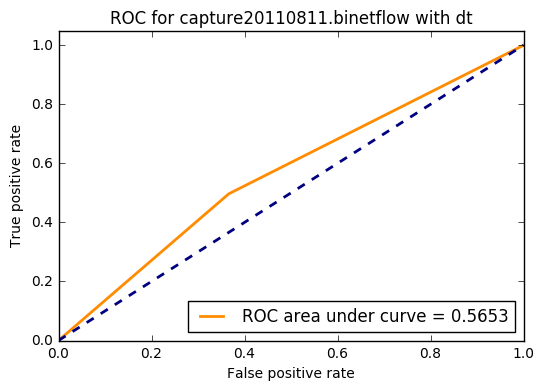

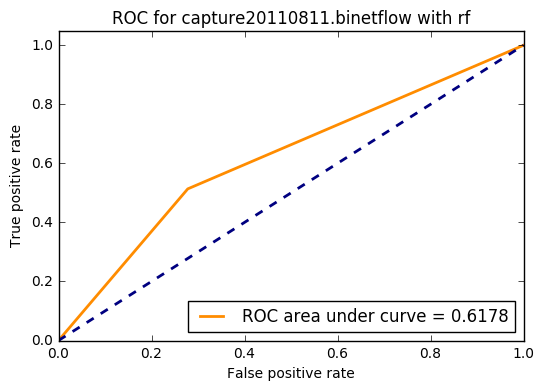

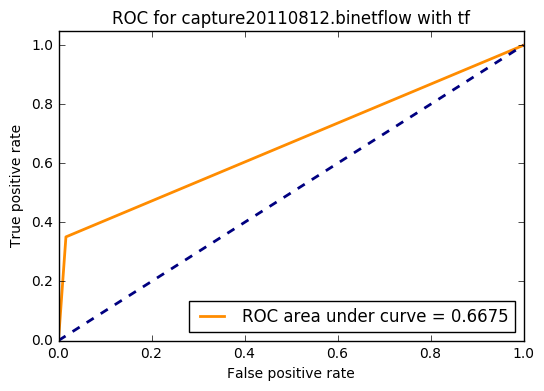

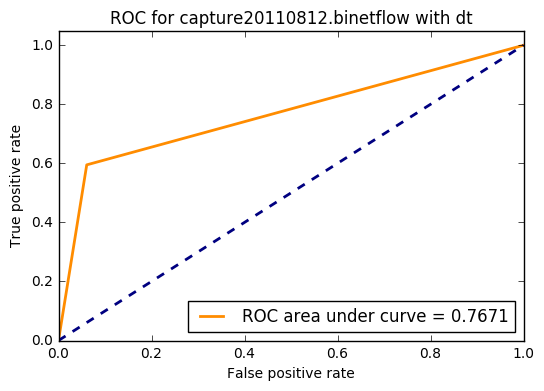

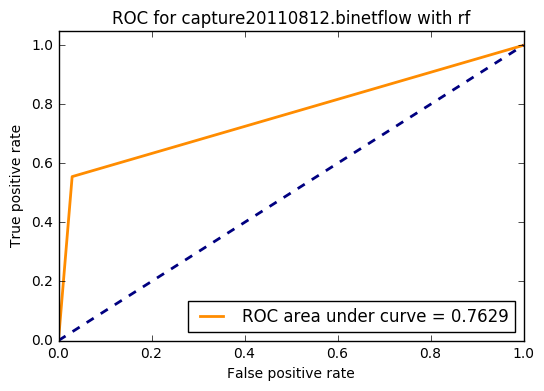

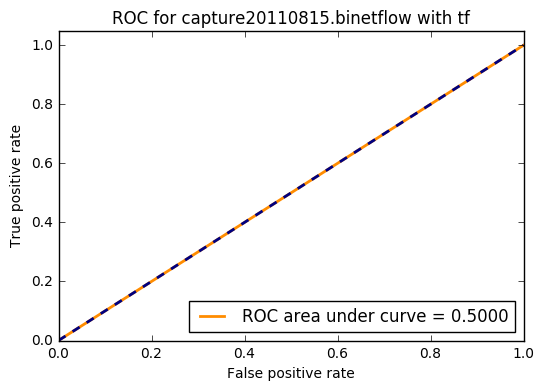

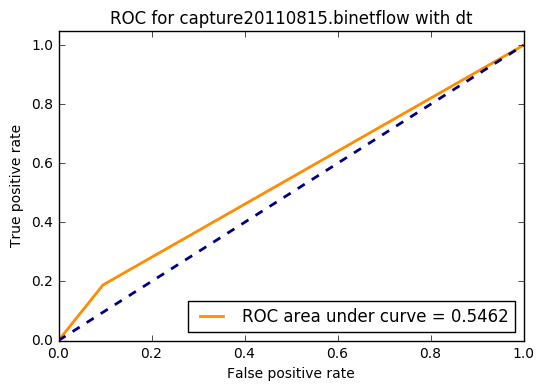

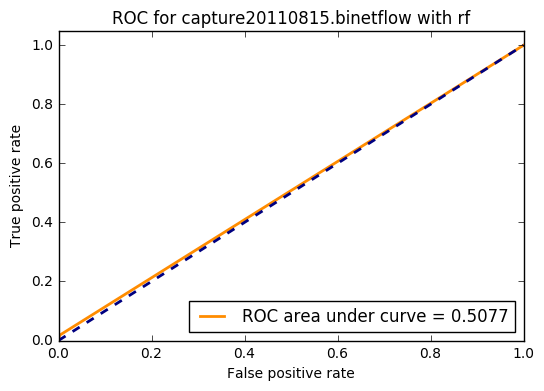

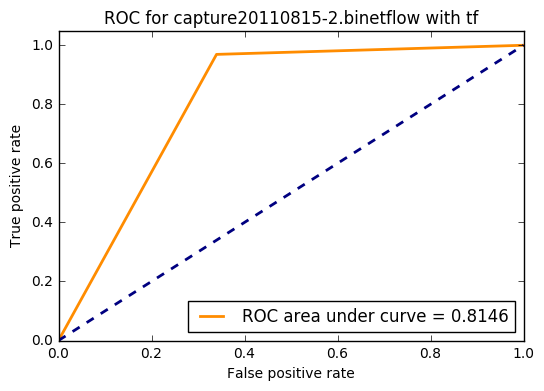

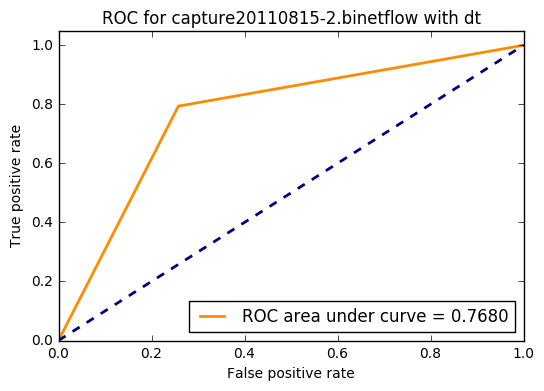

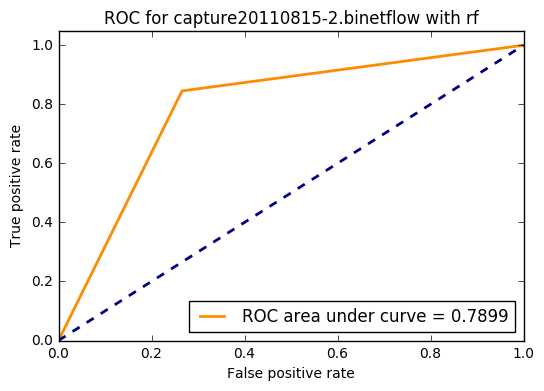

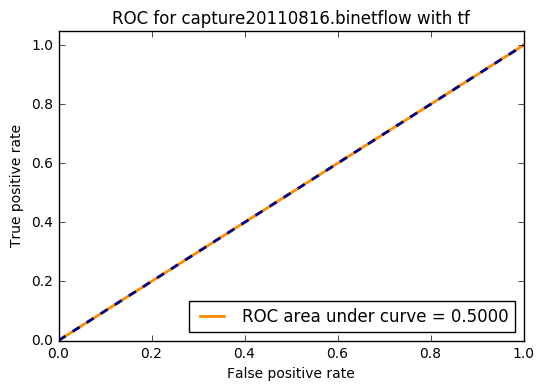

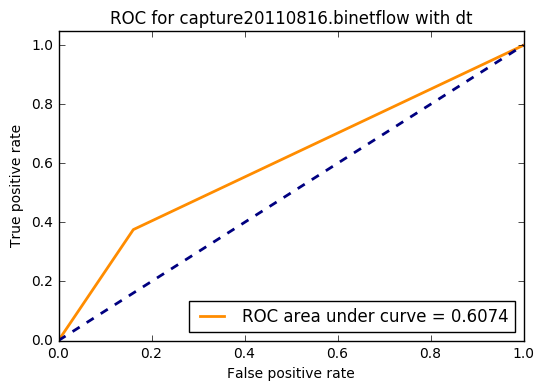

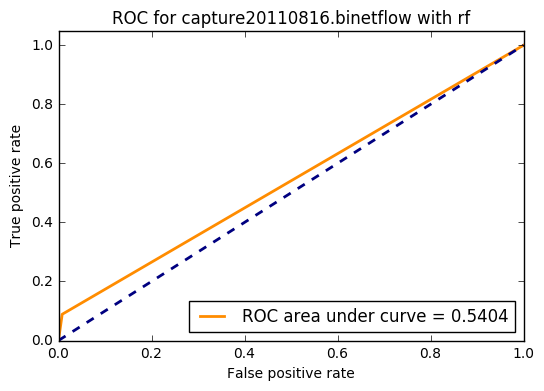

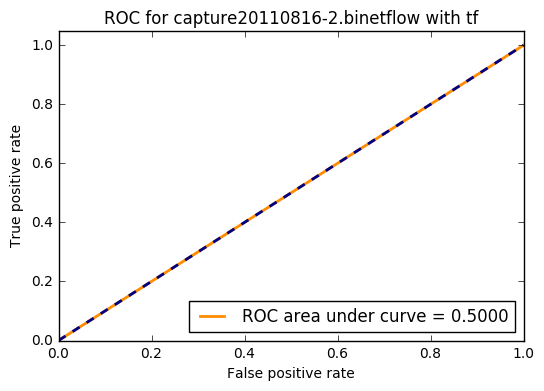

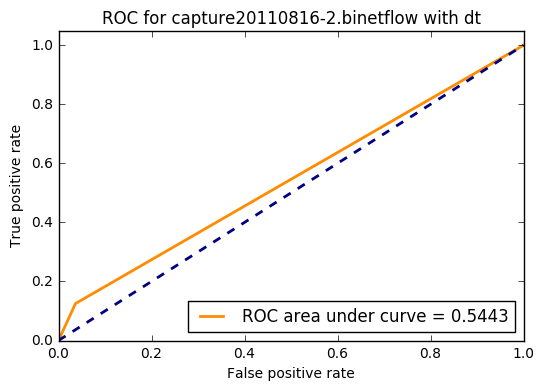

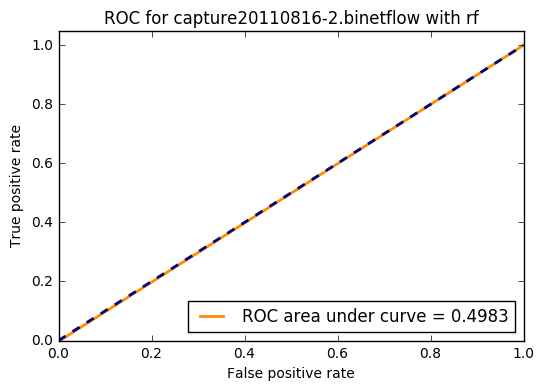

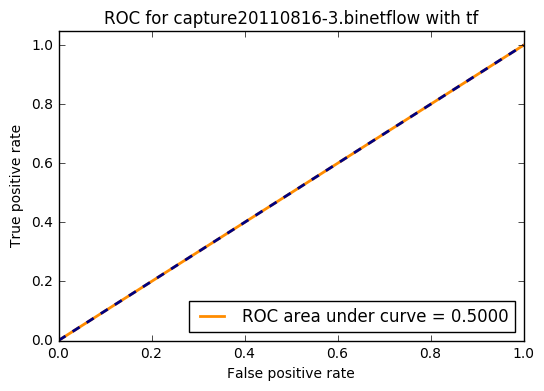

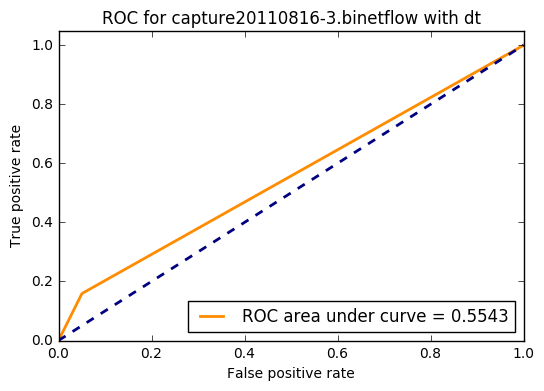

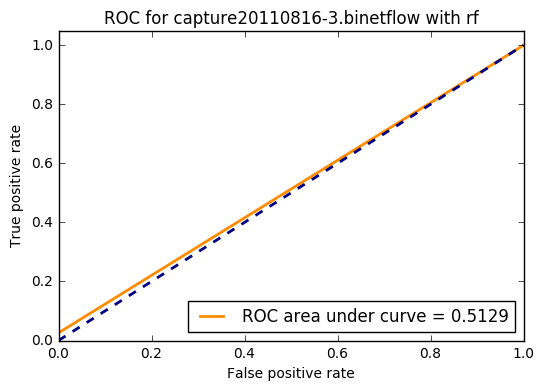

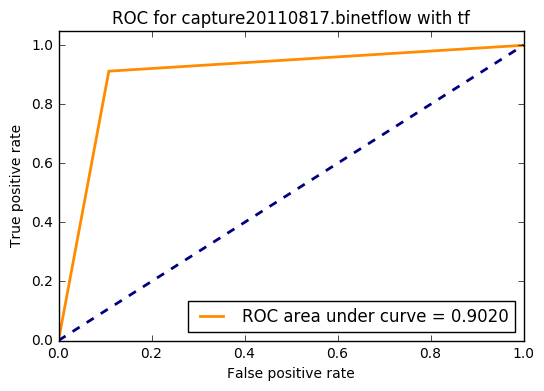

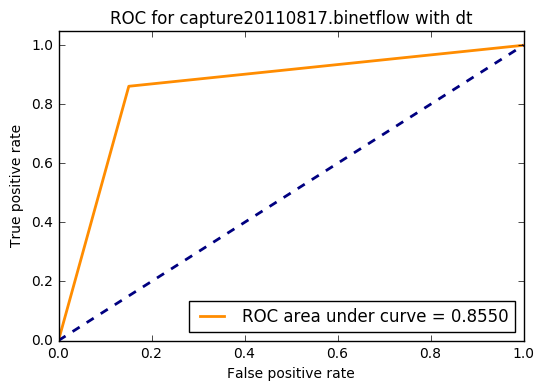

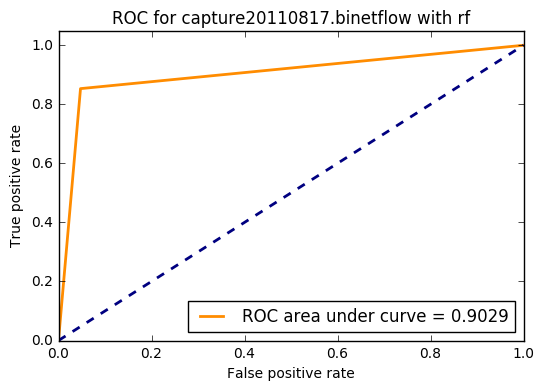

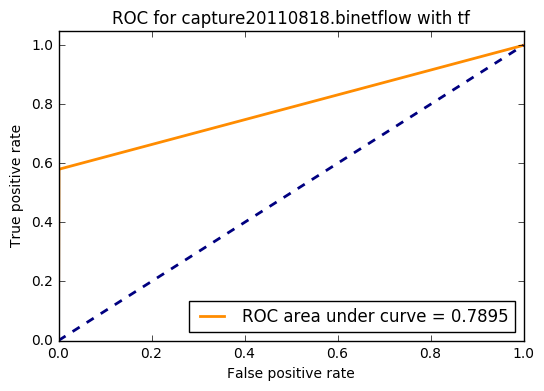

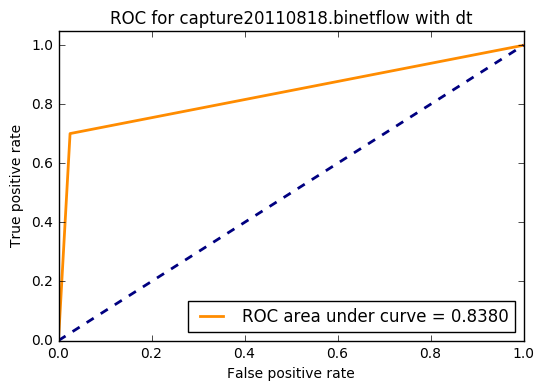

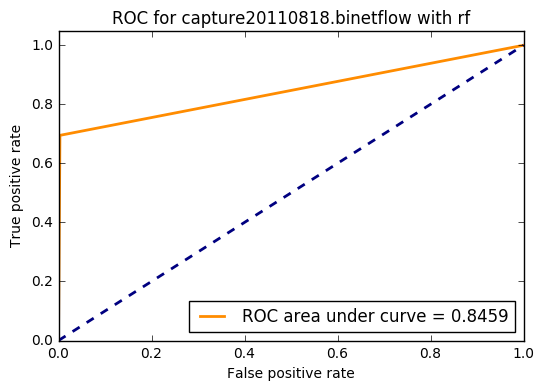

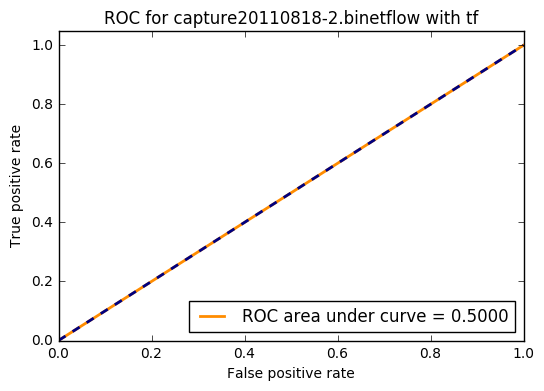

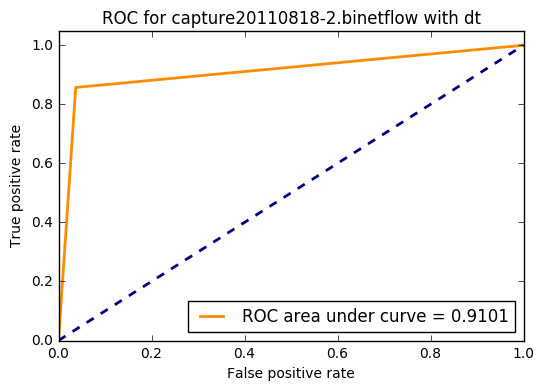

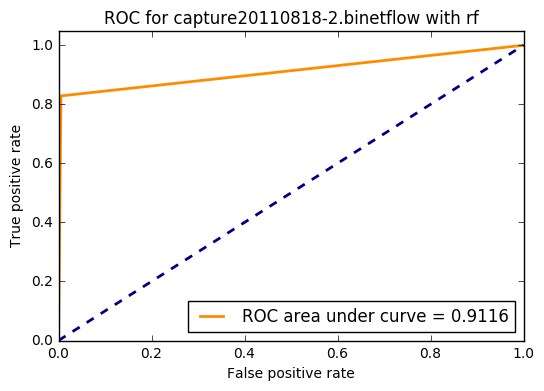

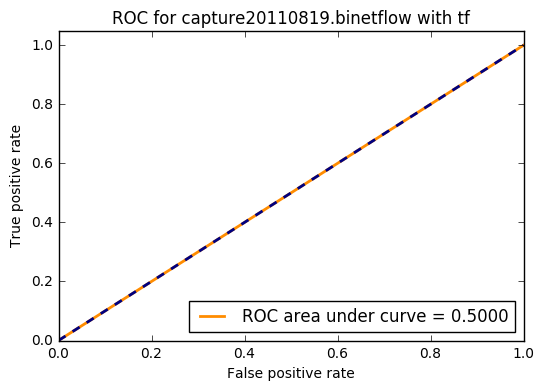

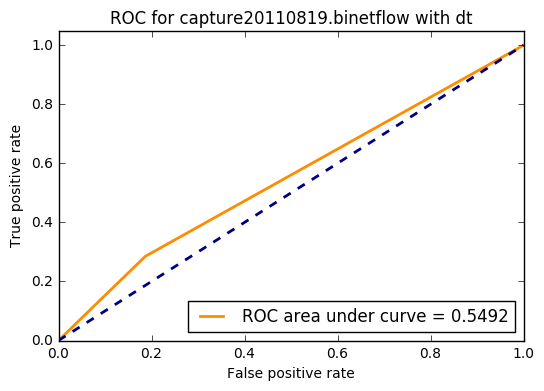

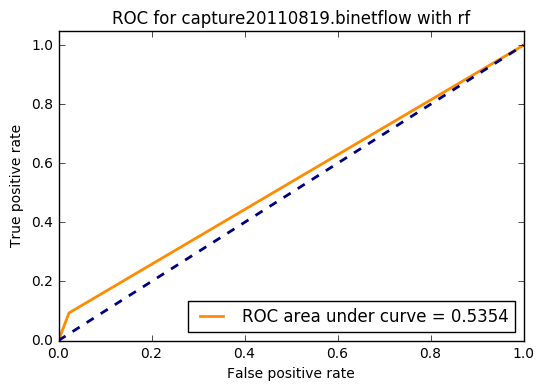

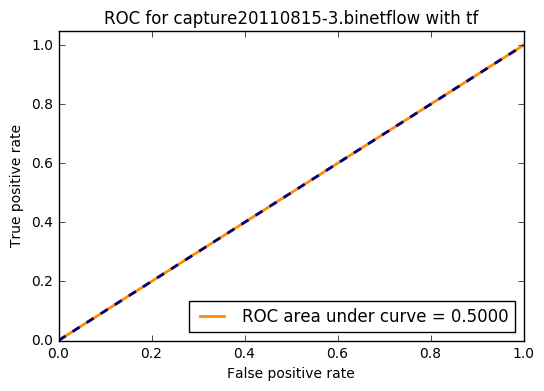

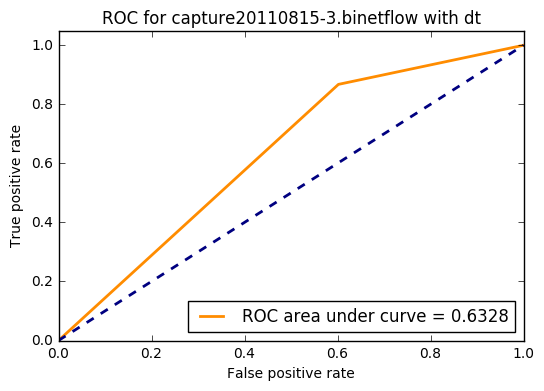

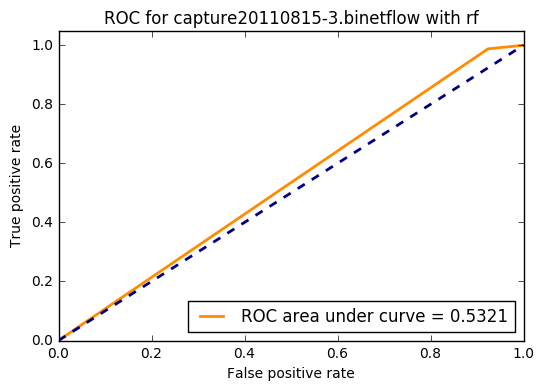

In [18]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(2, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)